# Nonlinear optimisation in 2D

The following notebook provides examples of several nonlinear optimisation methods (steepest descent, Newton, different conjugate-gradient variants, BFGS, and L-BFGS) applied to various 2D test functions.

## 0. Import some Python packages

We begin by importing some Python packages for matrix-vector operations, for plotting, and for a collection of 2D test functions.

In [48]:
# Some Python packages.

import matplotlib.pyplot as plt
import numpy as np
import test_functions as f

%matplotlib inline

# Set some parameters to make plots nicer.

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({"font.size": 70})
plt.rcParams["xtick.major.pad"] = "20"
plt.rcParams["ytick.major.pad"] = "20"

## 1. Input parameters and initialisation

In the following, we set a few input parameters, including the initial coordinates, the initial step length for the line search, the line search method, the optimisation method, and the test function we would like to use. Currently implemented test functions are:

\begin{equation}
f(x,y) = (1.0-x)^2 + 100.0 *(y-x^2)^2\,,\qquad \text{(Rosenbrock function)}\,,
\end{equation}

\begin{equation}
f(x,y) = x^2 + y^2 + xy\,,\qquad \text{(quadratic function)}\,,
\end{equation}

\begin{equation}
f(x,y) = (x^2 + y - 11.0)^2 + (x + y^2 - 7.0)^2\,,\qquad \text{(Himmelblau function)}\,,
\end{equation}

\begin{equation}
f(x,y) = (x-2.0)^4 + (x - 2.0y)^2\,,\qquad \text{(Bazaraa-Shetty function)}\,.
\end{equation}

In [49]:
# Input parameters ------------------------------------------------------------------------

# Initial coordinates.
x0 = -0.55
y0 = 0.55

# Initial step length (also serves as step length increment in exhaustive, full line search).
s_min = 0.001

# Test function ('rosenbrock', 'quadratic', 'himmelblau', 'bazaraa-shetty').
function = "rosenbrock"

# Line search method ('quadratic', 'full')
ls_method = "full"

# Number of iterations.
nit = 30

# Print misfit.
print_misfit = True

# Save figures.
save_figure = False

# Initialisations -------------------------------------------------------------------------

# Useful plotting domains and optima for the test functions.
if function == "quadratic":
    xmin = -2.1
    xmax = 2.1
    ymin = -2.1
    ymax = 2.1
    xopt = 0.0
    yopt = 0.0
elif function == "rosenbrock":
    xmin = -1.1
    xmax = 1.1
    ymin = -1.5
    ymax = 1.5
    xopt = 1.0
    yopt = 1.0
elif function == "himmelblau":
    xmin = -5.5
    xmax = 5.5
    ymin = -5.5
    ymax = 7.5
    xopt = -2.80511809
    yopt = 3.13131252
    # There are three other minima!
elif function == "bazaraa-shetty":
    xmin = 1.5
    xmax = 2.6
    ymin = 0.8
    ymax = 1.3
    xopt = 2.0
    yopt = 1.0

# Make domain for plotting.
xp, yp = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))

# Initialise coordinates. ---------------------------------------------------------------
opt = np.matrix([[xopt], [yopt]])

## 2. Line search and updating

Before implementing any specific optimisation method, we write a little helper function that performs a line search and updates the current position. The function takes the current position $\mathbf{x}$, the descent direction $\mathbf{h}$, and the initial step length $s$.

Two line search options are available:

(1) A *full* line search where a large number of step lengths are tested. In this case, the initial step length $s$ also serves as the step length increment.

(2) A *quadratic* line search where the misfit along the search direction is approximated by a quadratic curve fitted to three trial step lengths.

In [50]:
def line_search(x, h, s, function="rosenbrock", ls_method="quadratic"):

    # Quadratic interpolation. ---------------------------
    if ls_method == "quadratic":

        # Trial models.
        x0 = x
        chi0 = f.f(x0[0, 0], x0[1, 0], function)

        s1 = s
        x1 = x + s1 * h
        chi1 = f.f(x1[0, 0], x1[1, 0], function)

        s2 = 2.0 * s
        x2 = x + s2 * h
        chi2 = f.f(x2[0, 0], x2[1, 0], function)

        # - Polynomial coefficients and optimum.

        a = chi0
        c = (s2 * (chi1 - chi0) + s1 * (chi0 - chi2)) / (s1 * s1 * s2 - s1 * s2 * s2)
        b = (chi1 - chi0 - c * s1 * s1) / s1

        s_opt = -b / (2.0 * c)

        # Update.
        x_opt = x + s_opt * h
        chi_opt = f.f(x_opt[0, 0], x_opt[1, 0], function)

    # Full search along the line. ------------------------
    if ls_method == "full":

        # Initialise.
        chi_opt = f.f(x[0, 0], x[1, 0], function)
        x_opt = x
        s_opt = s

        # March through many trial step lengths.
        x_test = x + s * h
        chi_test = f.f(x_test[0, 0], x_test[1, 0], function)
        if chi_test >= chi_opt:
            print("minimum step length too long")
            s_opt = 0.0
            x_opt = x
        else:

            # Iterate.
            while chi_test < chi_opt:
                chi_opt = chi_test
                x_opt = x_test
                s_opt += s
                x_test = x + s_opt * h
                chi_test = f.f(x_test[0, 0], x_test[1, 0], function)

            # Update.
            # x_opt=x+s_opt*h
            # chi_opt=f.f(x_opt[0,0],x_opt[1,0],function)

    # Return. --------------------------------------------
    return x_opt, chi_opt, s_opt

## 3. Steepest descent

iteration=0, misfit=8.528125
iteration=1, misfit=2.793831
iteration=2, misfit=2.757015
iteration=3, misfit=1.283178
iteration=4, misfit=1.210994
iteration=5, misfit=1.153658
iteration=6, misfit=1.100564
iteration=7, misfit=1.053552
iteration=8, misfit=1.009712
iteration=9, misfit=0.969218
iteration=10, misfit=0.930390
iteration=11, misfit=0.895106
iteration=12, misfit=0.860508
iteration=13, misfit=0.828936
iteration=14, misfit=0.797896
iteration=15, misfit=0.769105
iteration=16, misfit=0.741410
iteration=17, misfit=0.714637
iteration=18, misfit=0.688684
iteration=19, misfit=0.665124
iteration=20, misfit=0.644371
iteration=21, misfit=0.624548
iteration=22, misfit=0.606550
iteration=23, misfit=0.589657
iteration=24, misfit=0.573848
iteration=25, misfit=0.558424
iteration=26, misfit=0.542014
iteration=27, misfit=0.526665
iteration=28, misfit=0.505566
iteration=29, misfit=0.485544
iteration=30, misfit=0.141635


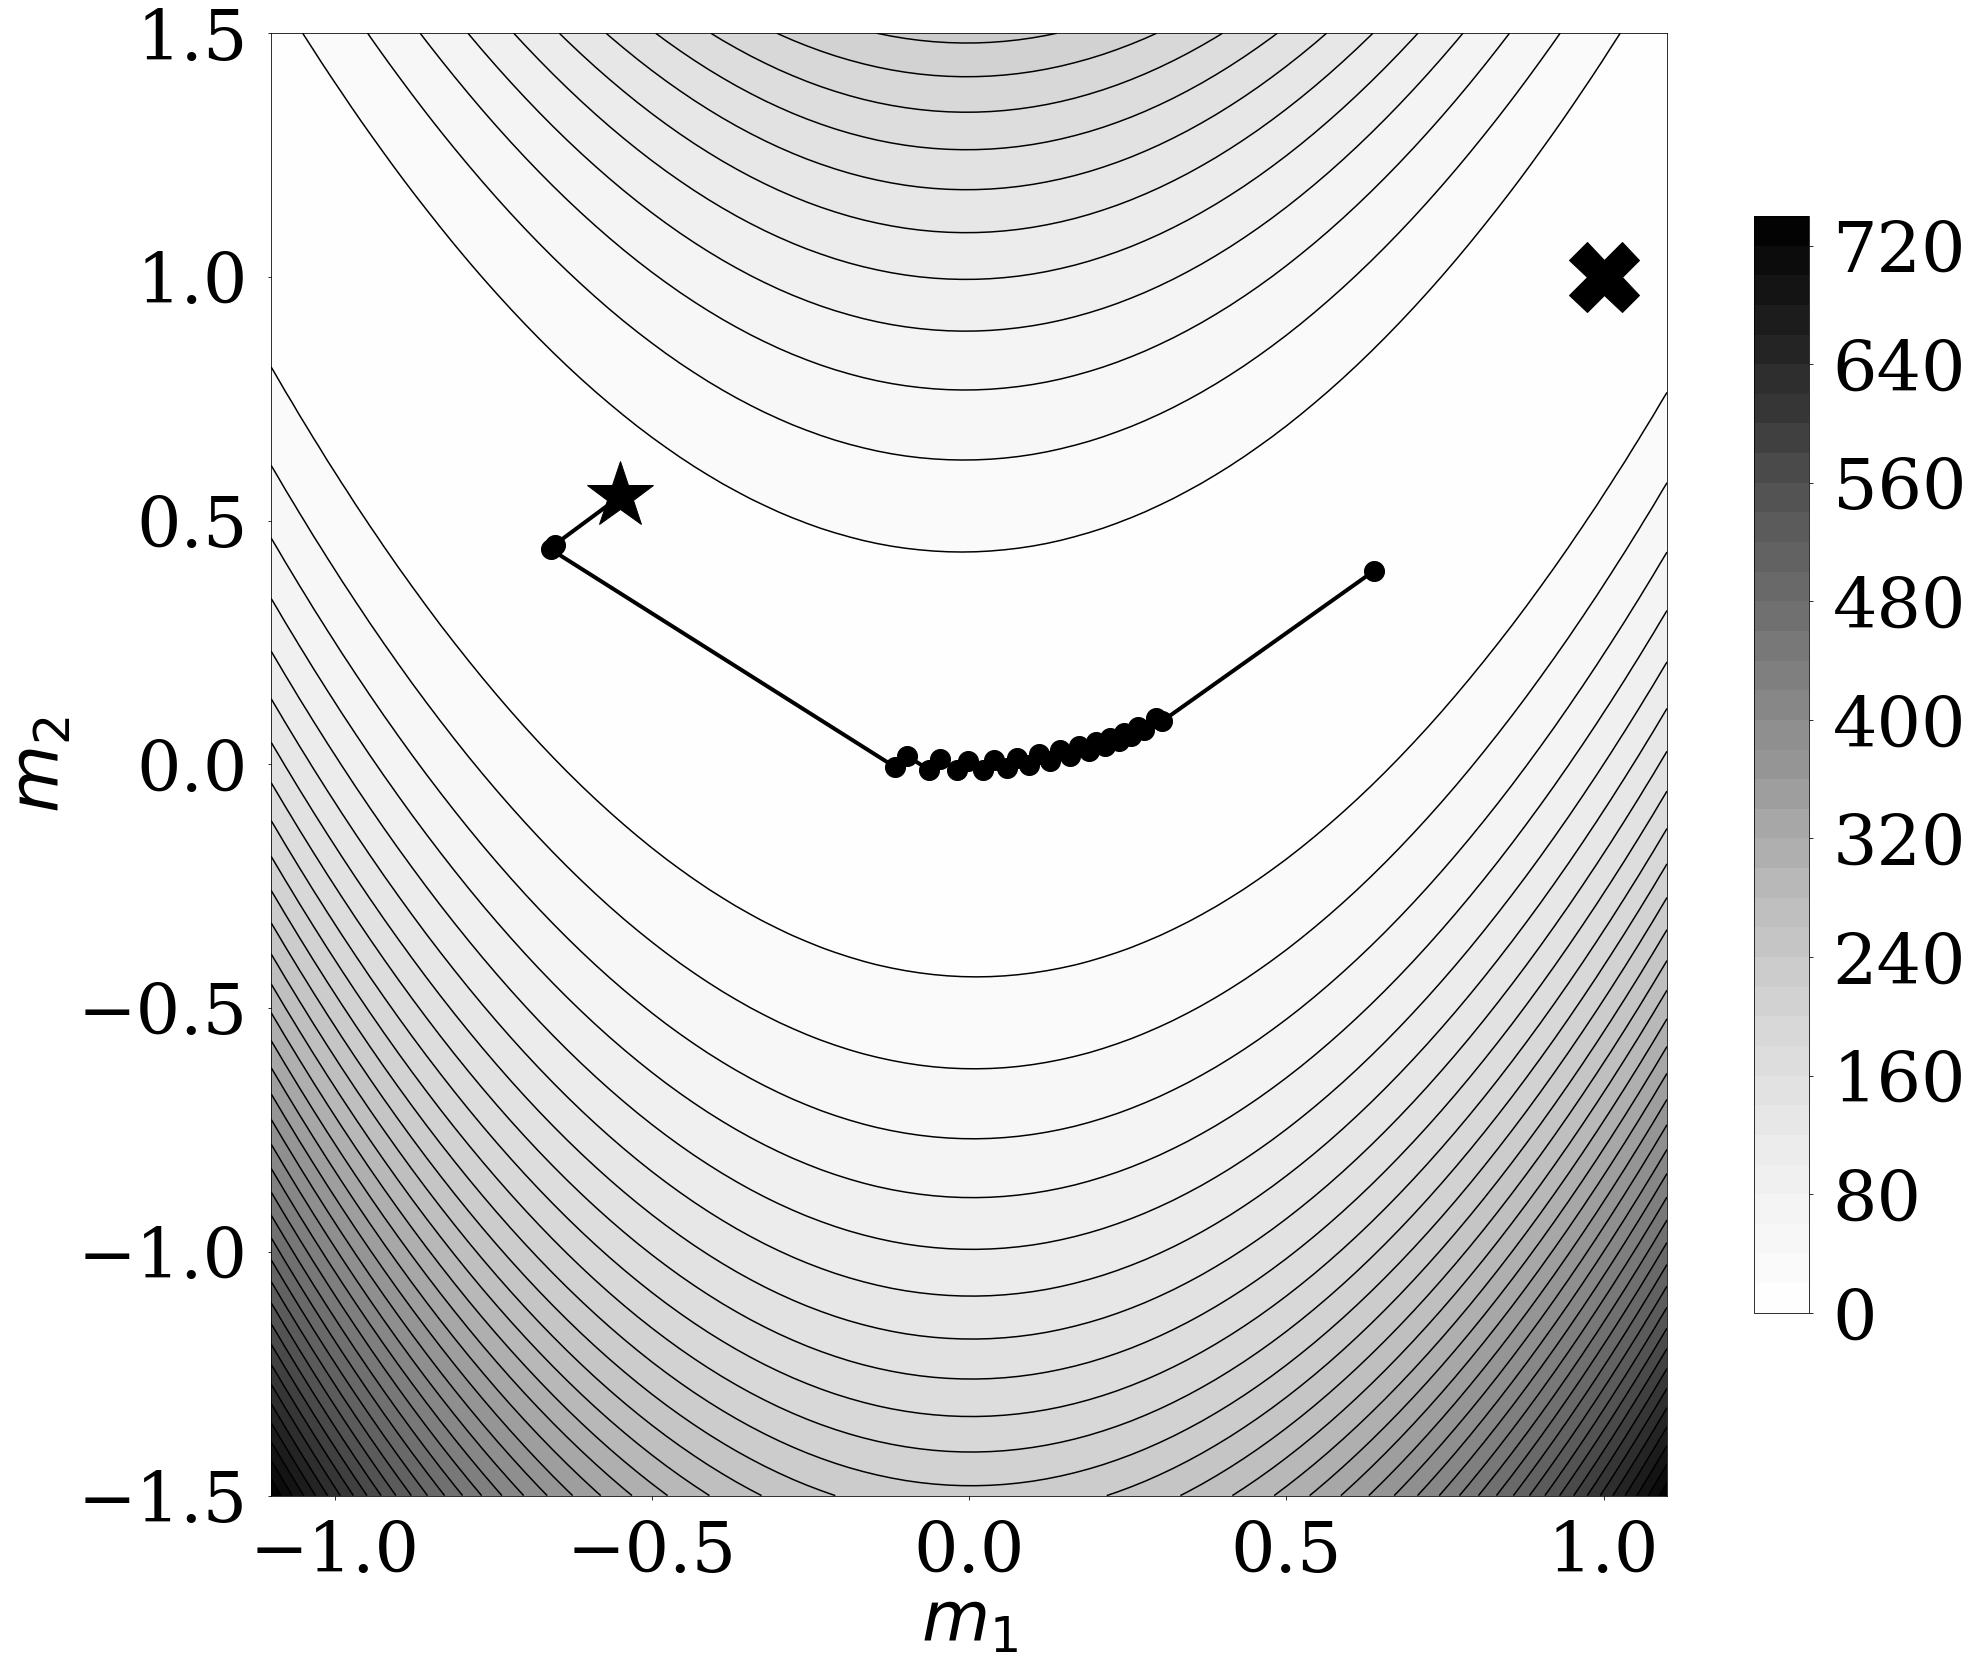

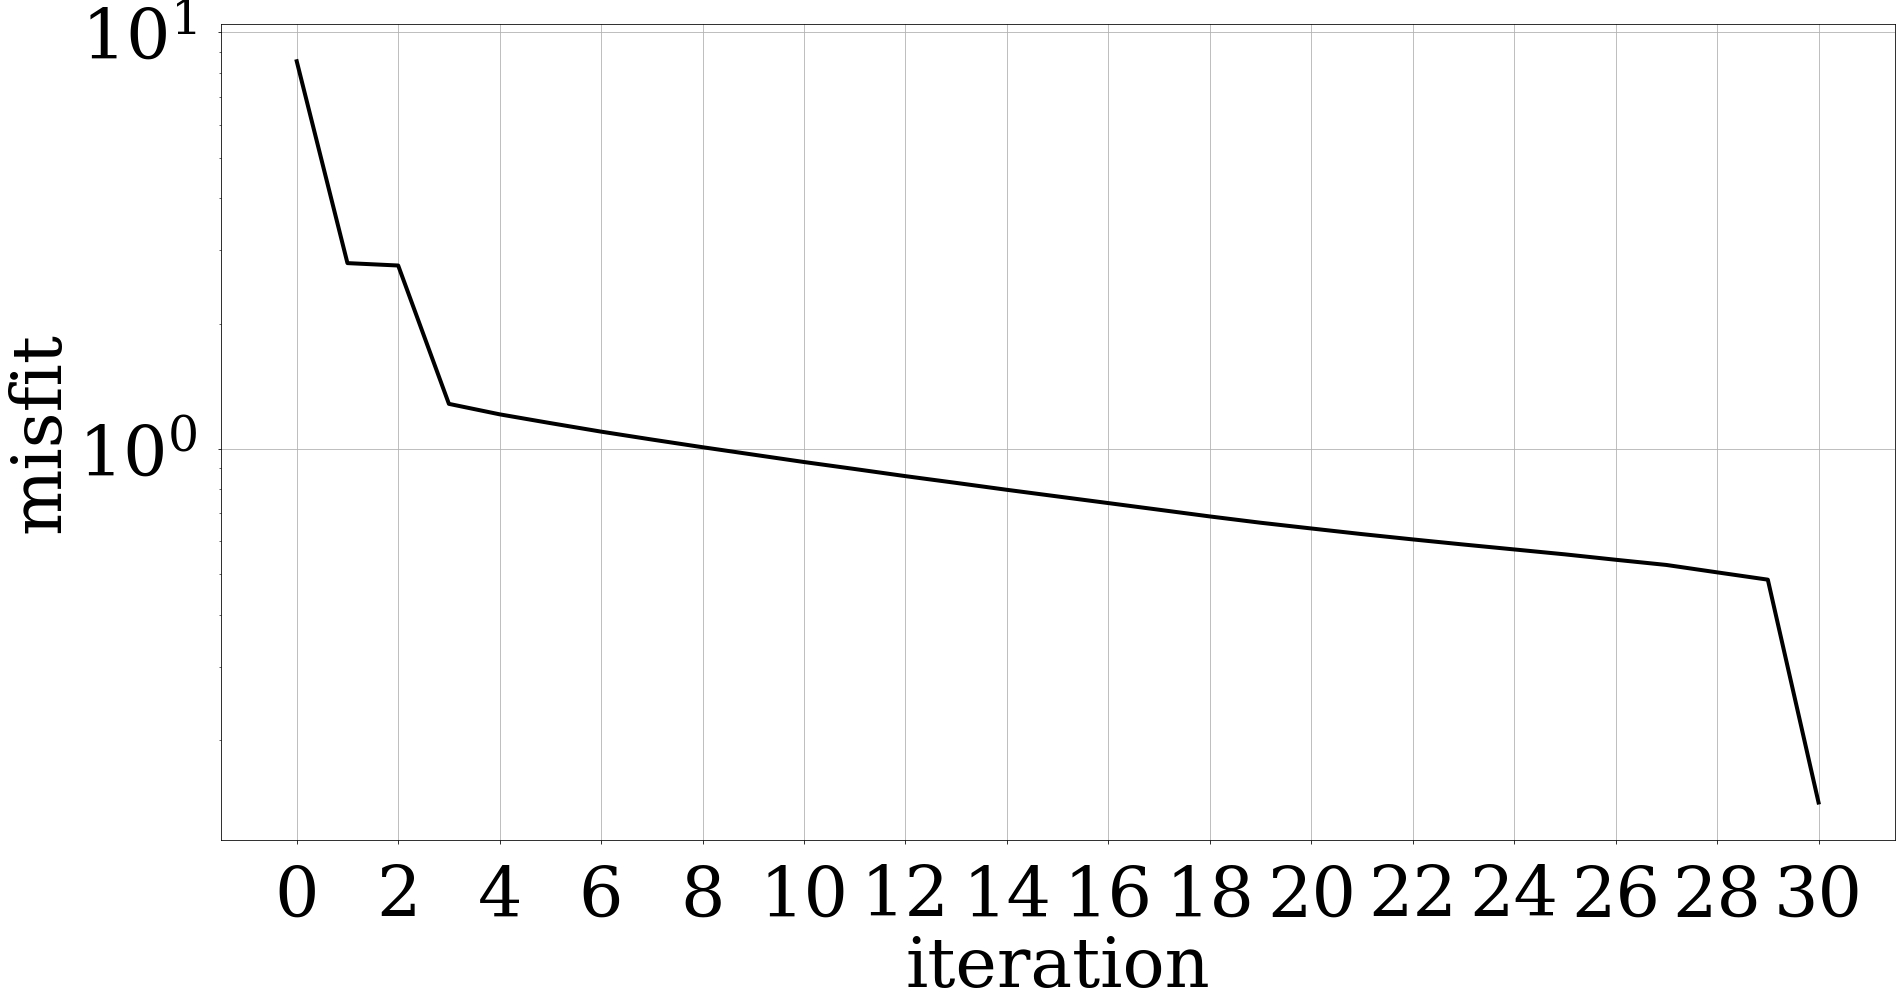

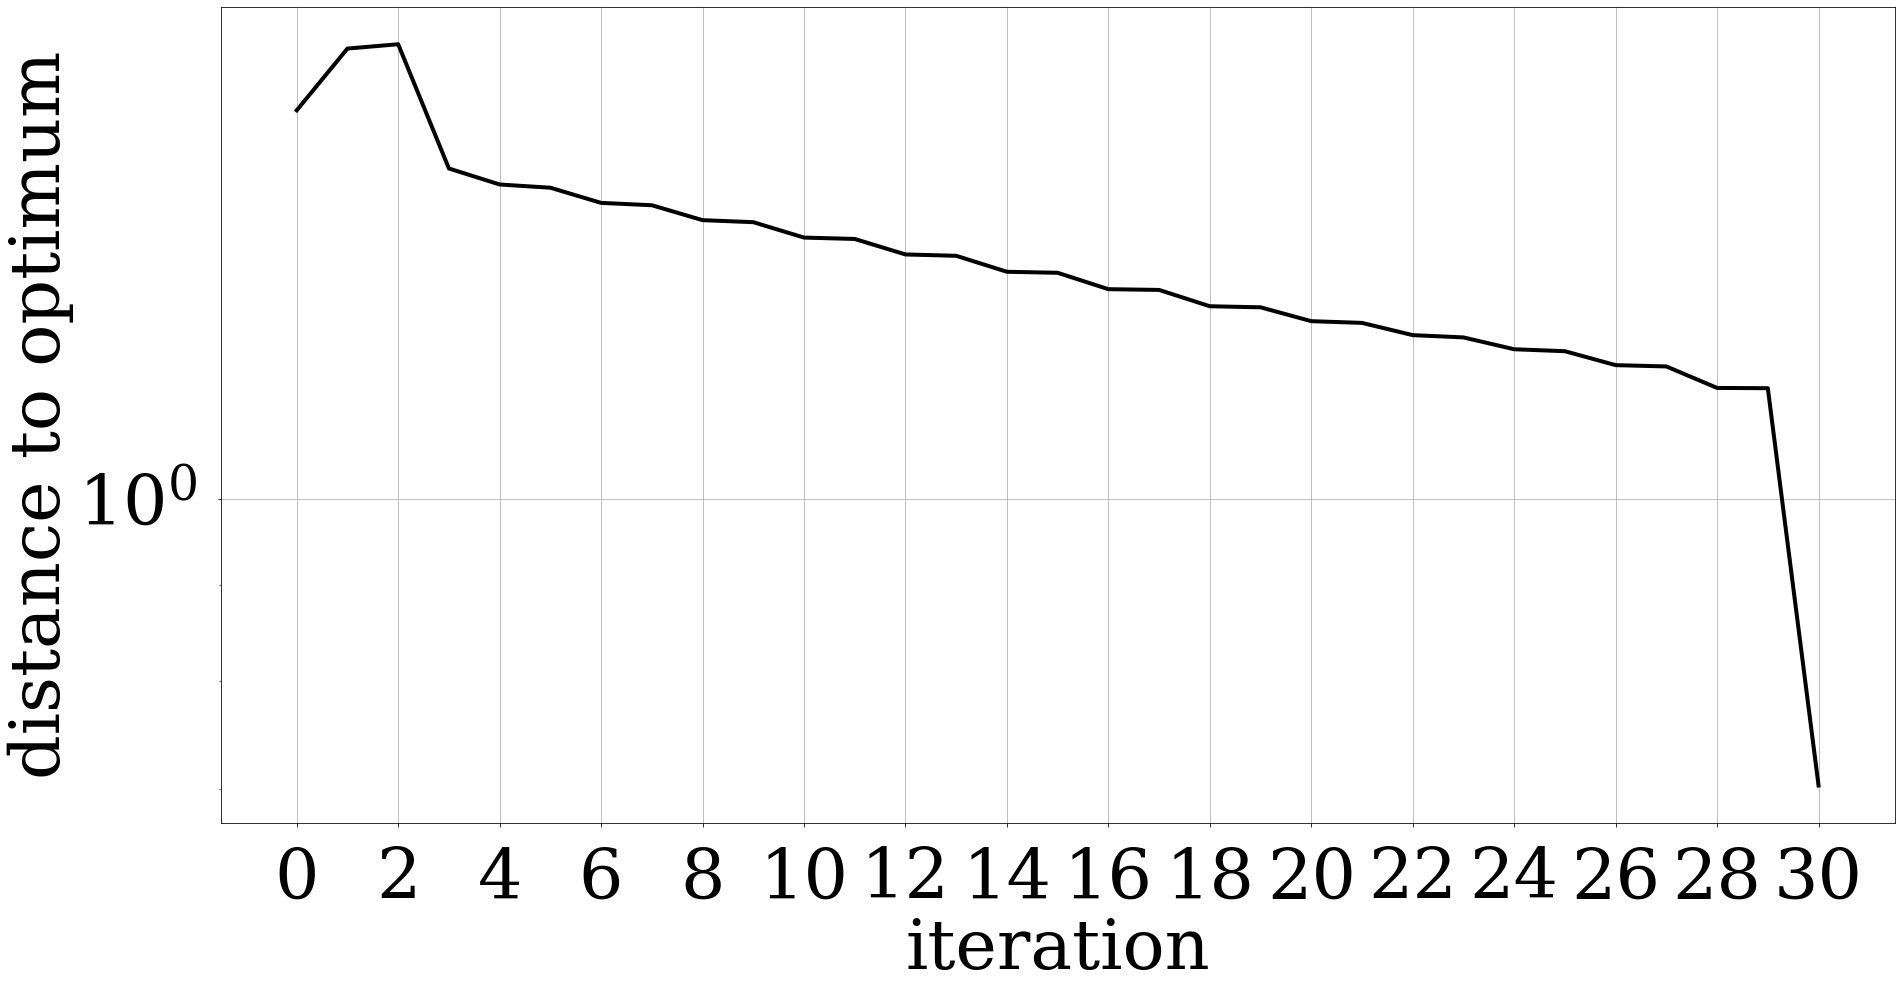

In [62]:
# Initialise coordinates and misfit. --------------------
x = np.matrix([[x0], [y0]])
chi_sd = np.zeros(nit + 1)
chi_sd[0] = f.f(x[0, 0], x[1, 0], function)
diff_sd = np.zeros(nit + 1)
diff_sd[0] = np.linalg.norm(x - opt)
plt.subplots(1, figsize=(30, 25))
plt.plot(x[0, 0], x[1, 0], "k*", markersize=70)
plt.plot(xopt, yopt, "kX", markersize=70) # Optimum

if print_misfit:
    print("iteration=0, misfit=%f" % chi_sd[0])

s = s_min

# Iterate. ----------------------------------------------
for it in range(nit):

    J = f.J(x[0, 0], x[1, 0], function)
    x_new, chi_sd[it + 1], s_opt = line_search(x, -J, s, function, ls_method)
    if s_opt == 0.0:
        s = s / 2.0
    plt.plot(x_new[0, 0], x_new[1, 0], "ko", markersize=20)
    plt.plot((x[0, 0], x_new[0, 0]), (x[1, 0], x_new[1, 0]), "k", linewidth=4)
    x = x_new
    diff_sd[it + 1] = np.linalg.norm(x - opt)

    if print_misfit:
        print("iteration=%d, misfit=%f" % (it + 1, chi_sd[it + 1]))

# Plot trajectory. --------------------------------------
f.f(xp, yp, function, plot=True)
plt.tight_layout()
if save_figure == True:
    plt.savefig("path_sd.pdf", format="pdf")
plt.show()

plt.subplots(1, figsize=(30, 15))
plt.semilogy(np.arange(0, nit + 1), chi_sd, "k", linewidth=4)
plt.xticks(np.arange(0, nit + 1, 2))
plt.xlabel("iteration")
plt.ylabel("misfit")
plt.grid()
if save_figure == True:
    plt.savefig("misfit_sd.pdf", format="pdf")
plt.show()

plt.subplots(1, figsize=(30, 15))
plt.semilogy(np.arange(0, nit + 1), diff_sd, "k", linewidth=4)
plt.xticks(range(0, nit + 1, 2))
plt.xlabel("iteration")
plt.ylabel("distance to optimum")
plt.grid()
if save_figure == True:
    plt.savefig("distance_sd.pdf", format="pdf")
plt.show()

## 4. Newton's method

iteration=0, misfit=8.528125
iteration=1, misfit=2.502698
iteration=2, misfit=297.842422
iteration=3, misfit=0.071589
iteration=4, misfit=0.512255
iteration=5, misfit=0.000000
iteration=6, misfit=0.000000
iteration=7, misfit=0.000000
iteration=8, misfit=0.000000
iteration=9, misfit=0.000000
iteration=10, misfit=0.000000
iteration=11, misfit=0.000000
iteration=12, misfit=0.000000
iteration=13, misfit=0.000000
iteration=14, misfit=0.000000
iteration=15, misfit=0.000000
iteration=16, misfit=0.000000
iteration=17, misfit=0.000000
iteration=18, misfit=0.000000
iteration=19, misfit=0.000000
iteration=20, misfit=0.000000
iteration=21, misfit=0.000000
iteration=22, misfit=0.000000
iteration=23, misfit=0.000000
iteration=24, misfit=0.000000
iteration=25, misfit=0.000000
iteration=26, misfit=0.000000
iteration=27, misfit=0.000000
iteration=28, misfit=0.000000
iteration=29, misfit=0.000000
iteration=30, misfit=0.000000


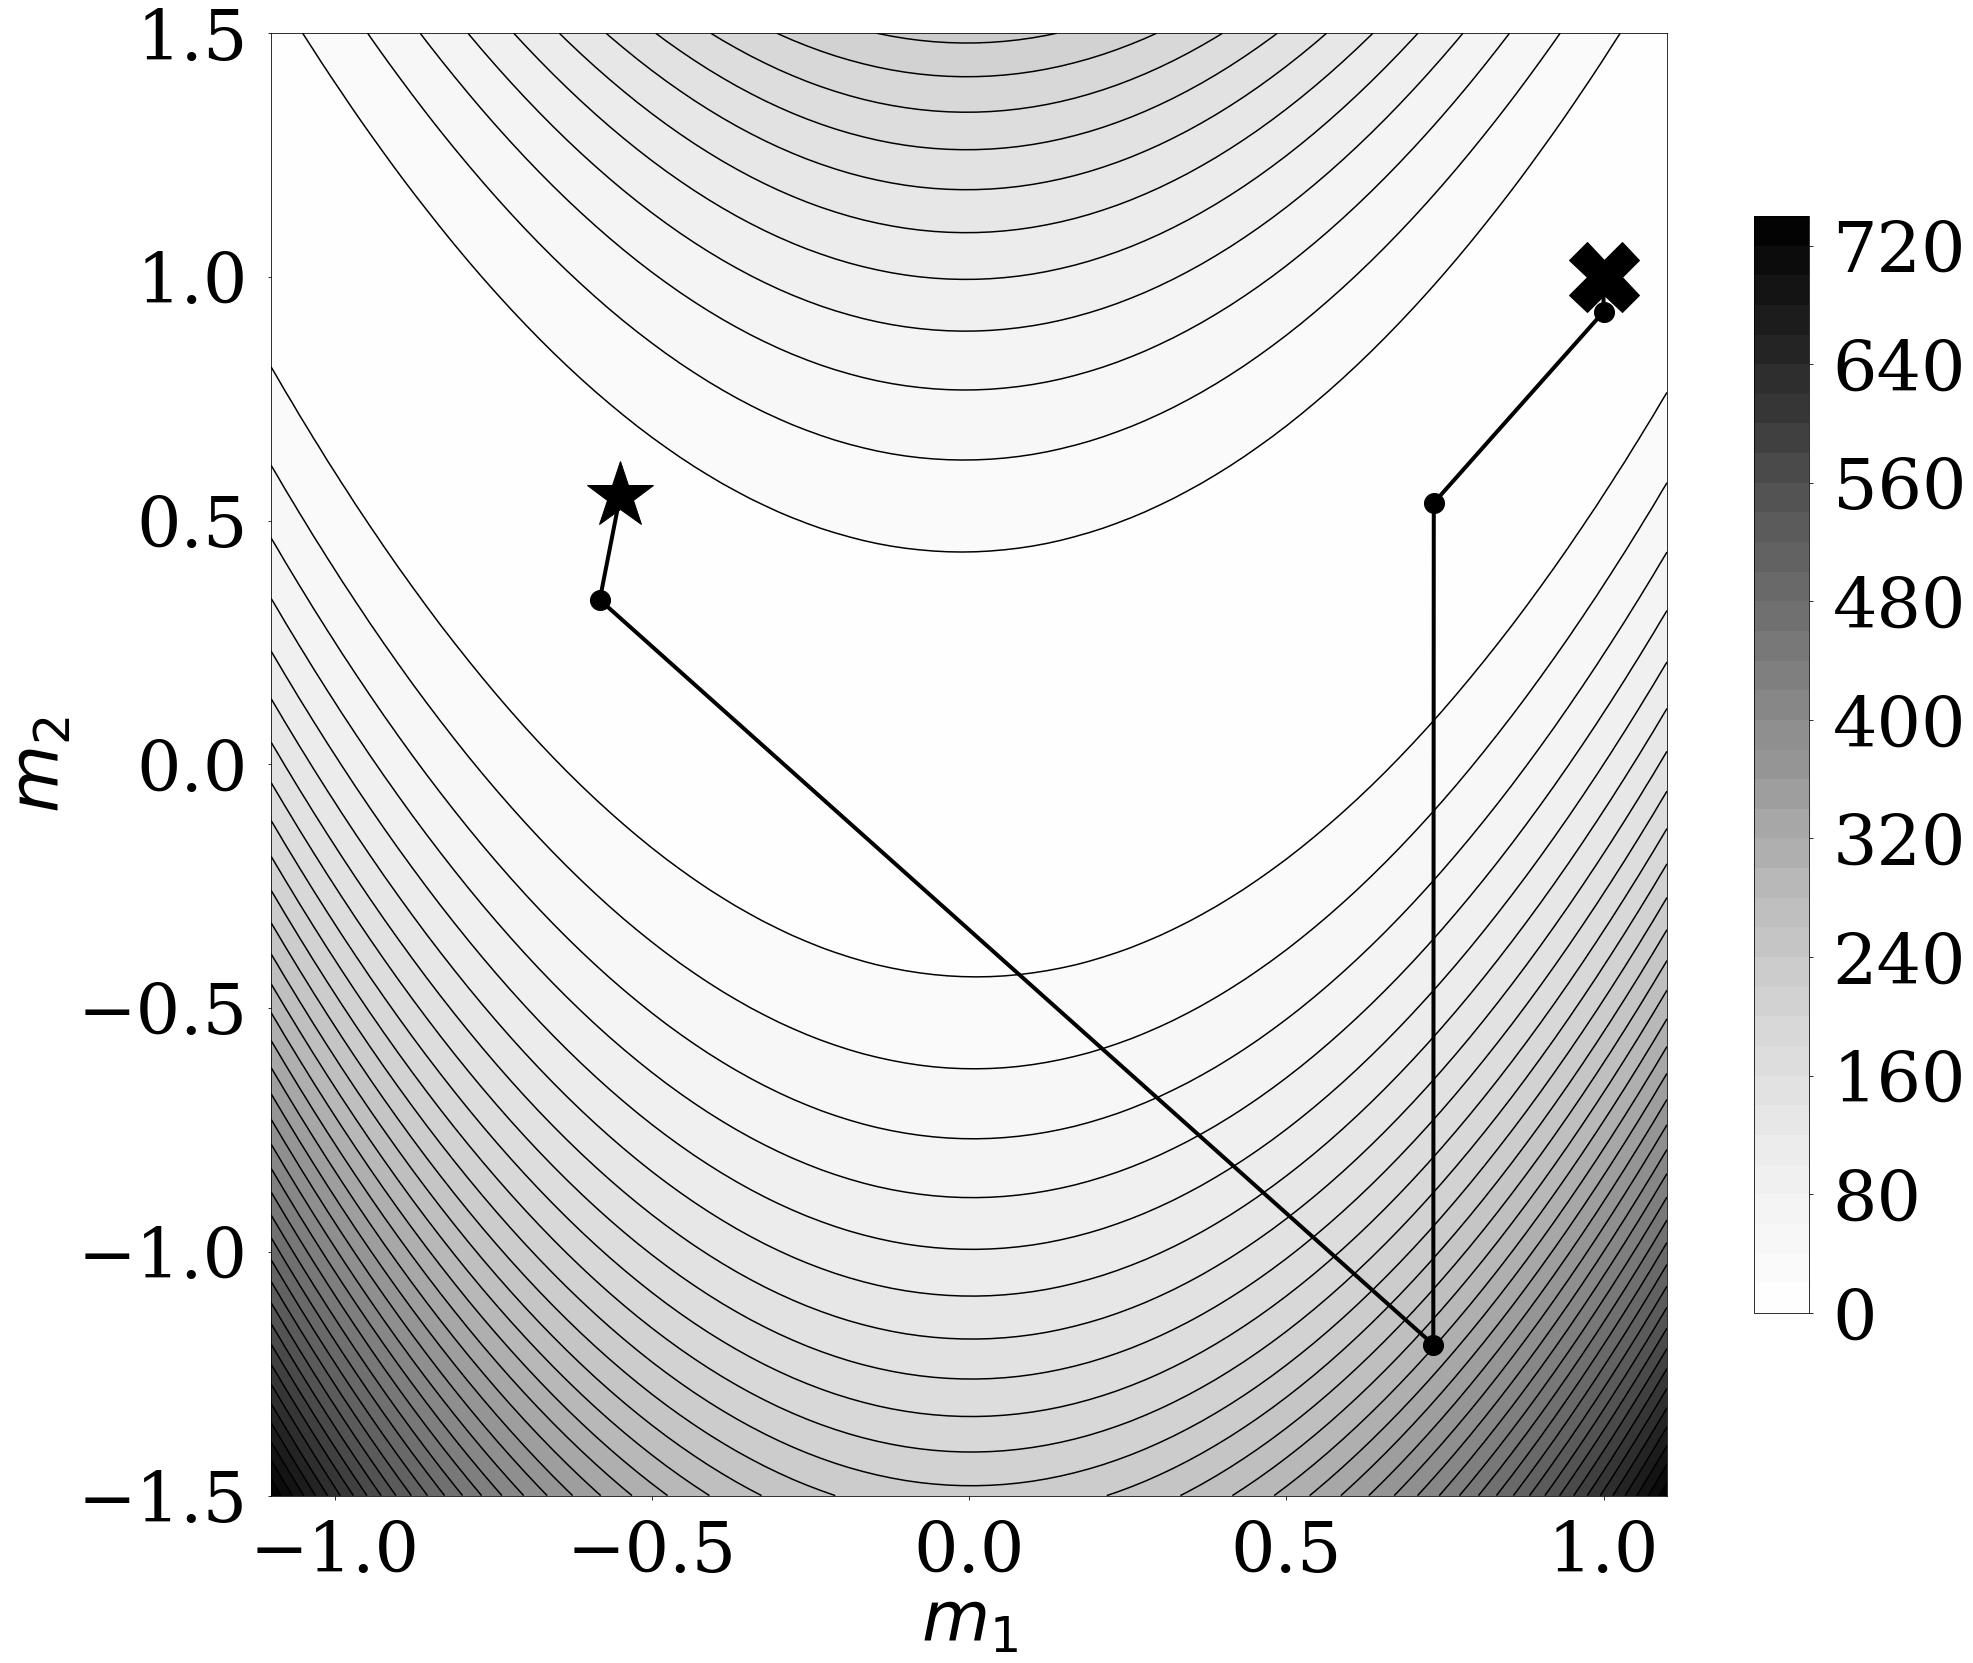

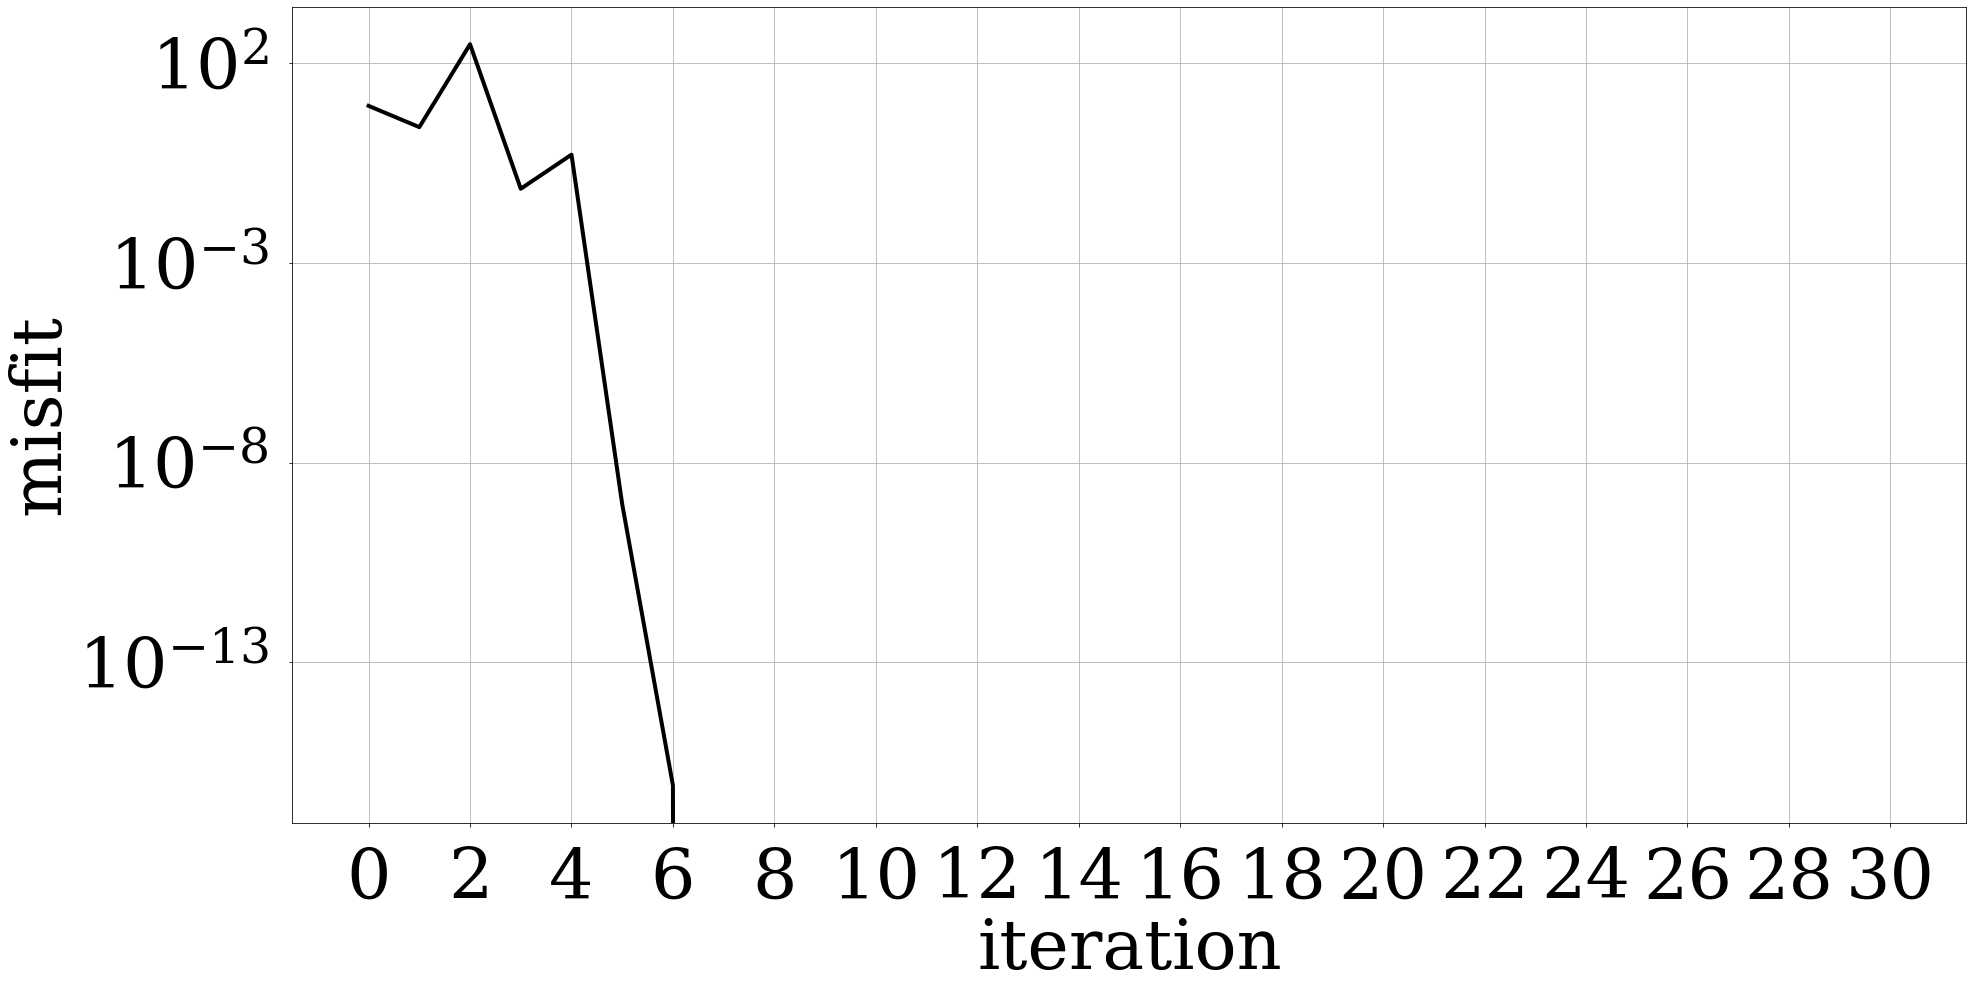

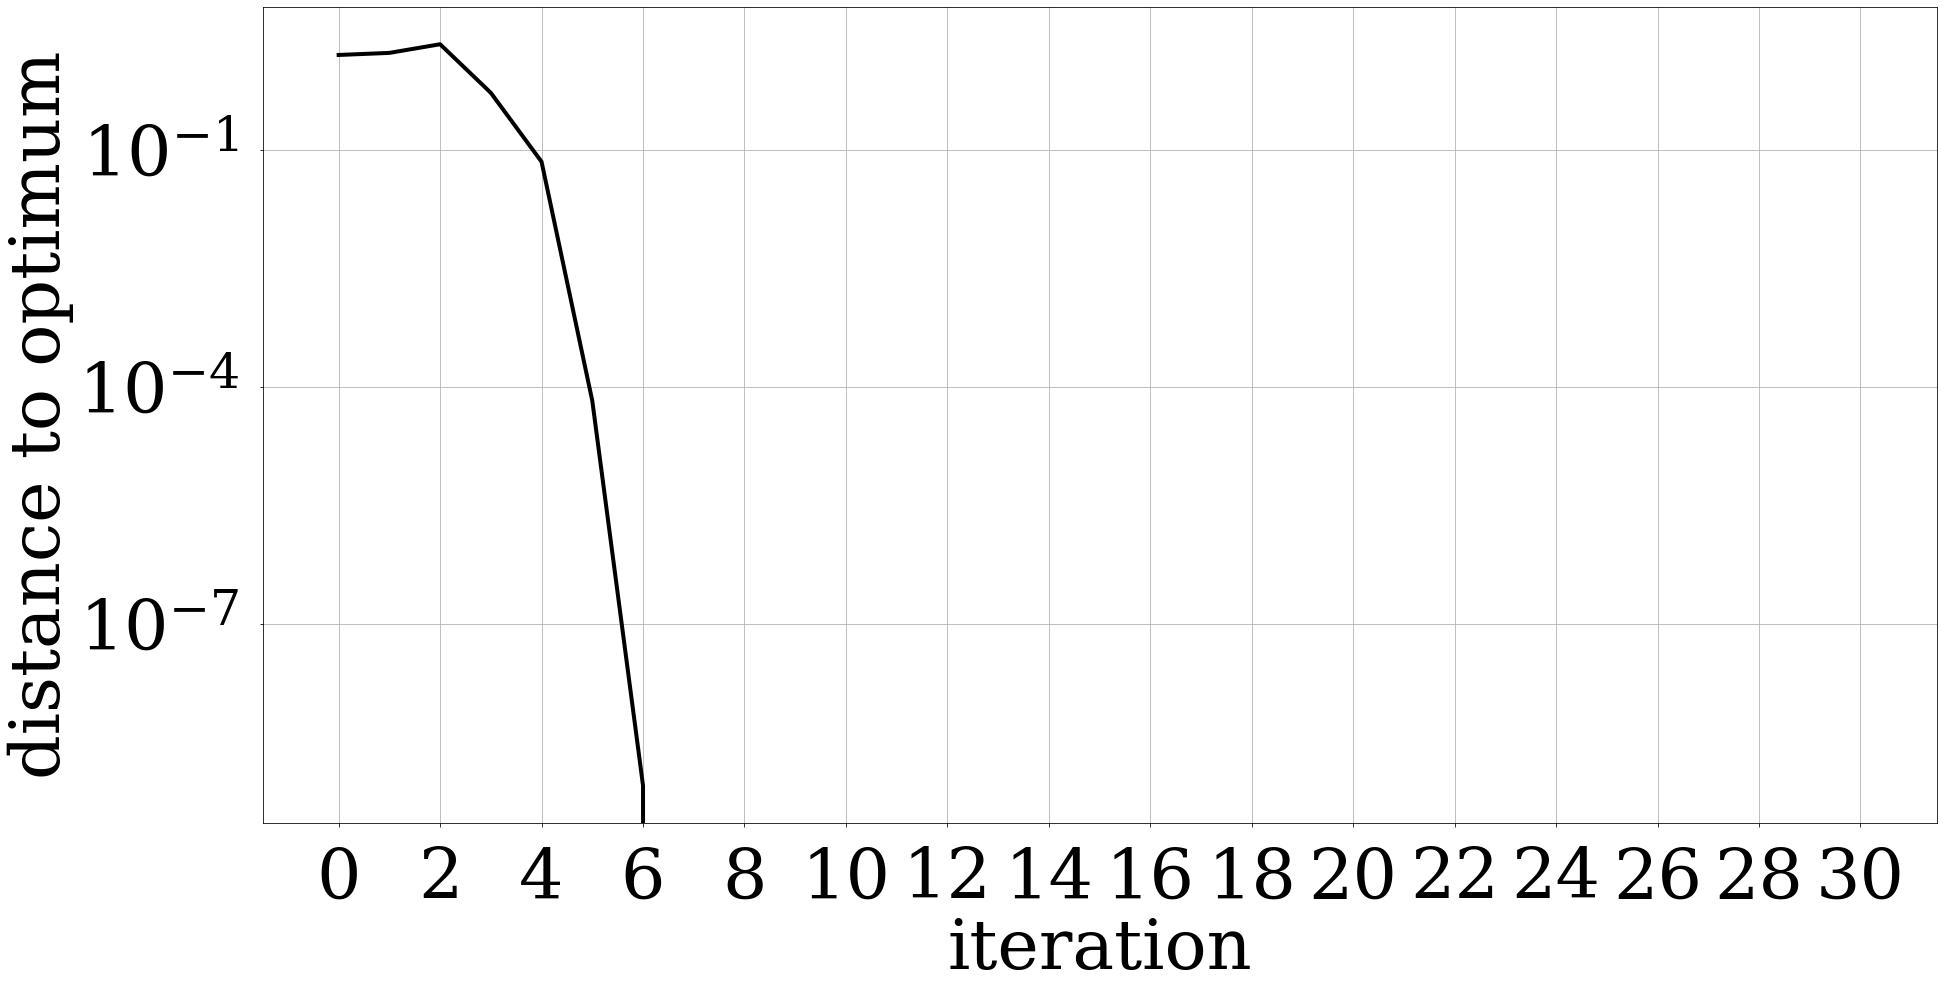

In [63]:
# Initialise coordinates and misfit. --------------------
x = np.matrix([[x0], [y0]])
chi_ne = np.zeros(nit + 1)
chi_ne[0] = f.f(x[0, 0], x[1, 0], function)
diff_ne = np.zeros(nit + 1)
diff_ne[0] = np.linalg.norm(x - opt)
plt.subplots(1, figsize=(30, 25))
plt.plot(x[0, 0], x[1, 0], "k*", markersize=70)
plt.plot(xopt, yopt, "kX", markersize=70) # Optimum
if print_misfit:
    print("iteration=0, misfit=%f" % chi_ne[0])

# Iterate. ----------------------------------------------
for it in range(nit):

    J = f.J(x[0, 0], x[1, 0], function) # Jacobian
    H = f.H(x[0, 0], x[1, 0], function) # Hessian
    h = -np.linalg.inv(H) * J
    x_new = x + h
    chi_ne[it + 1] = f.f(x_new[0, 0], x_new[1, 0], function)
    plt.plot(x_new[0, 0], x_new[1, 0], "ko", markersize=20)
    plt.plot((x[0, 0], x_new[0, 0]), (x[1, 0], x_new[1, 0]), "k", linewidth=4)
    x = x_new
    diff_ne[it + 1] = np.linalg.norm(x - opt)

    if print_misfit:
        print("iteration=%d, misfit=%f" % (it + 1, chi_ne[it + 1]))

# Plot trajectory. --------------------------------------
f.f(xp, yp, function, plot=True)
plt.tight_layout()
if save_figure == True:
    plt.savefig("path_newton.pdf", format="pdf")
plt.show()

plt.subplots(1, figsize=(30, 15))
plt.semilogy(np.arange(0, nit + 1), chi_ne, "k", linewidth=4)
plt.xticks(np.arange(0, nit + 1, 2))
plt.xlabel("iteration")
plt.ylabel("misfit")
plt.grid()
if save_figure == True:
    plt.savefig("misfit_newton.pdf", format="pdf")
plt.show()

plt.subplots(1, figsize=(30, 15))
plt.semilogy(np.arange(0, nit + 1), diff_ne, "k", linewidth=4)
plt.xticks(np.arange(0, nit + 1, 2))
plt.xlabel("iteration")
plt.ylabel("distance to optimum")
plt.grid()
if save_figure == True:
    plt.savefig("distance_newton.pdf", format="pdf")
plt.show()

## 5. Conjugate gradients (Fletcher-Reeves)

iteration=0, misfit=8.528125
iteration=1, misfit=2.793831
iteration=2, misfit=2.757515
iteration=3, misfit=1.981036
iteration=4, misfit=1.799193
iteration=5, misfit=1.661708
iteration=6, misfit=1.634264
minimum step length too long
iteration=7, misfit=1.634264
iteration=8, misfit=1.487992
iteration=9, misfit=1.456041
iteration=10, misfit=1.432335
minimum step length too long
iteration=11, misfit=1.432335
iteration=12, misfit=1.275740
iteration=13, misfit=1.240546
iteration=14, misfit=1.165588
iteration=15, misfit=1.126816
iteration=16, misfit=1.043354
iteration=17, misfit=0.872605
iteration=18, misfit=0.763860
iteration=19, misfit=0.668493
iteration=20, misfit=0.356391
iteration=21, misfit=0.078443
iteration=22, misfit=0.021695
iteration=23, misfit=0.021498
iteration=24, misfit=0.021350
iteration=25, misfit=0.007110
iteration=26, misfit=0.000009
iteration=27, misfit=0.000005
iteration=28, misfit=0.000005
iteration=29, misfit=0.000000
iteration=30, misfit=0.000000


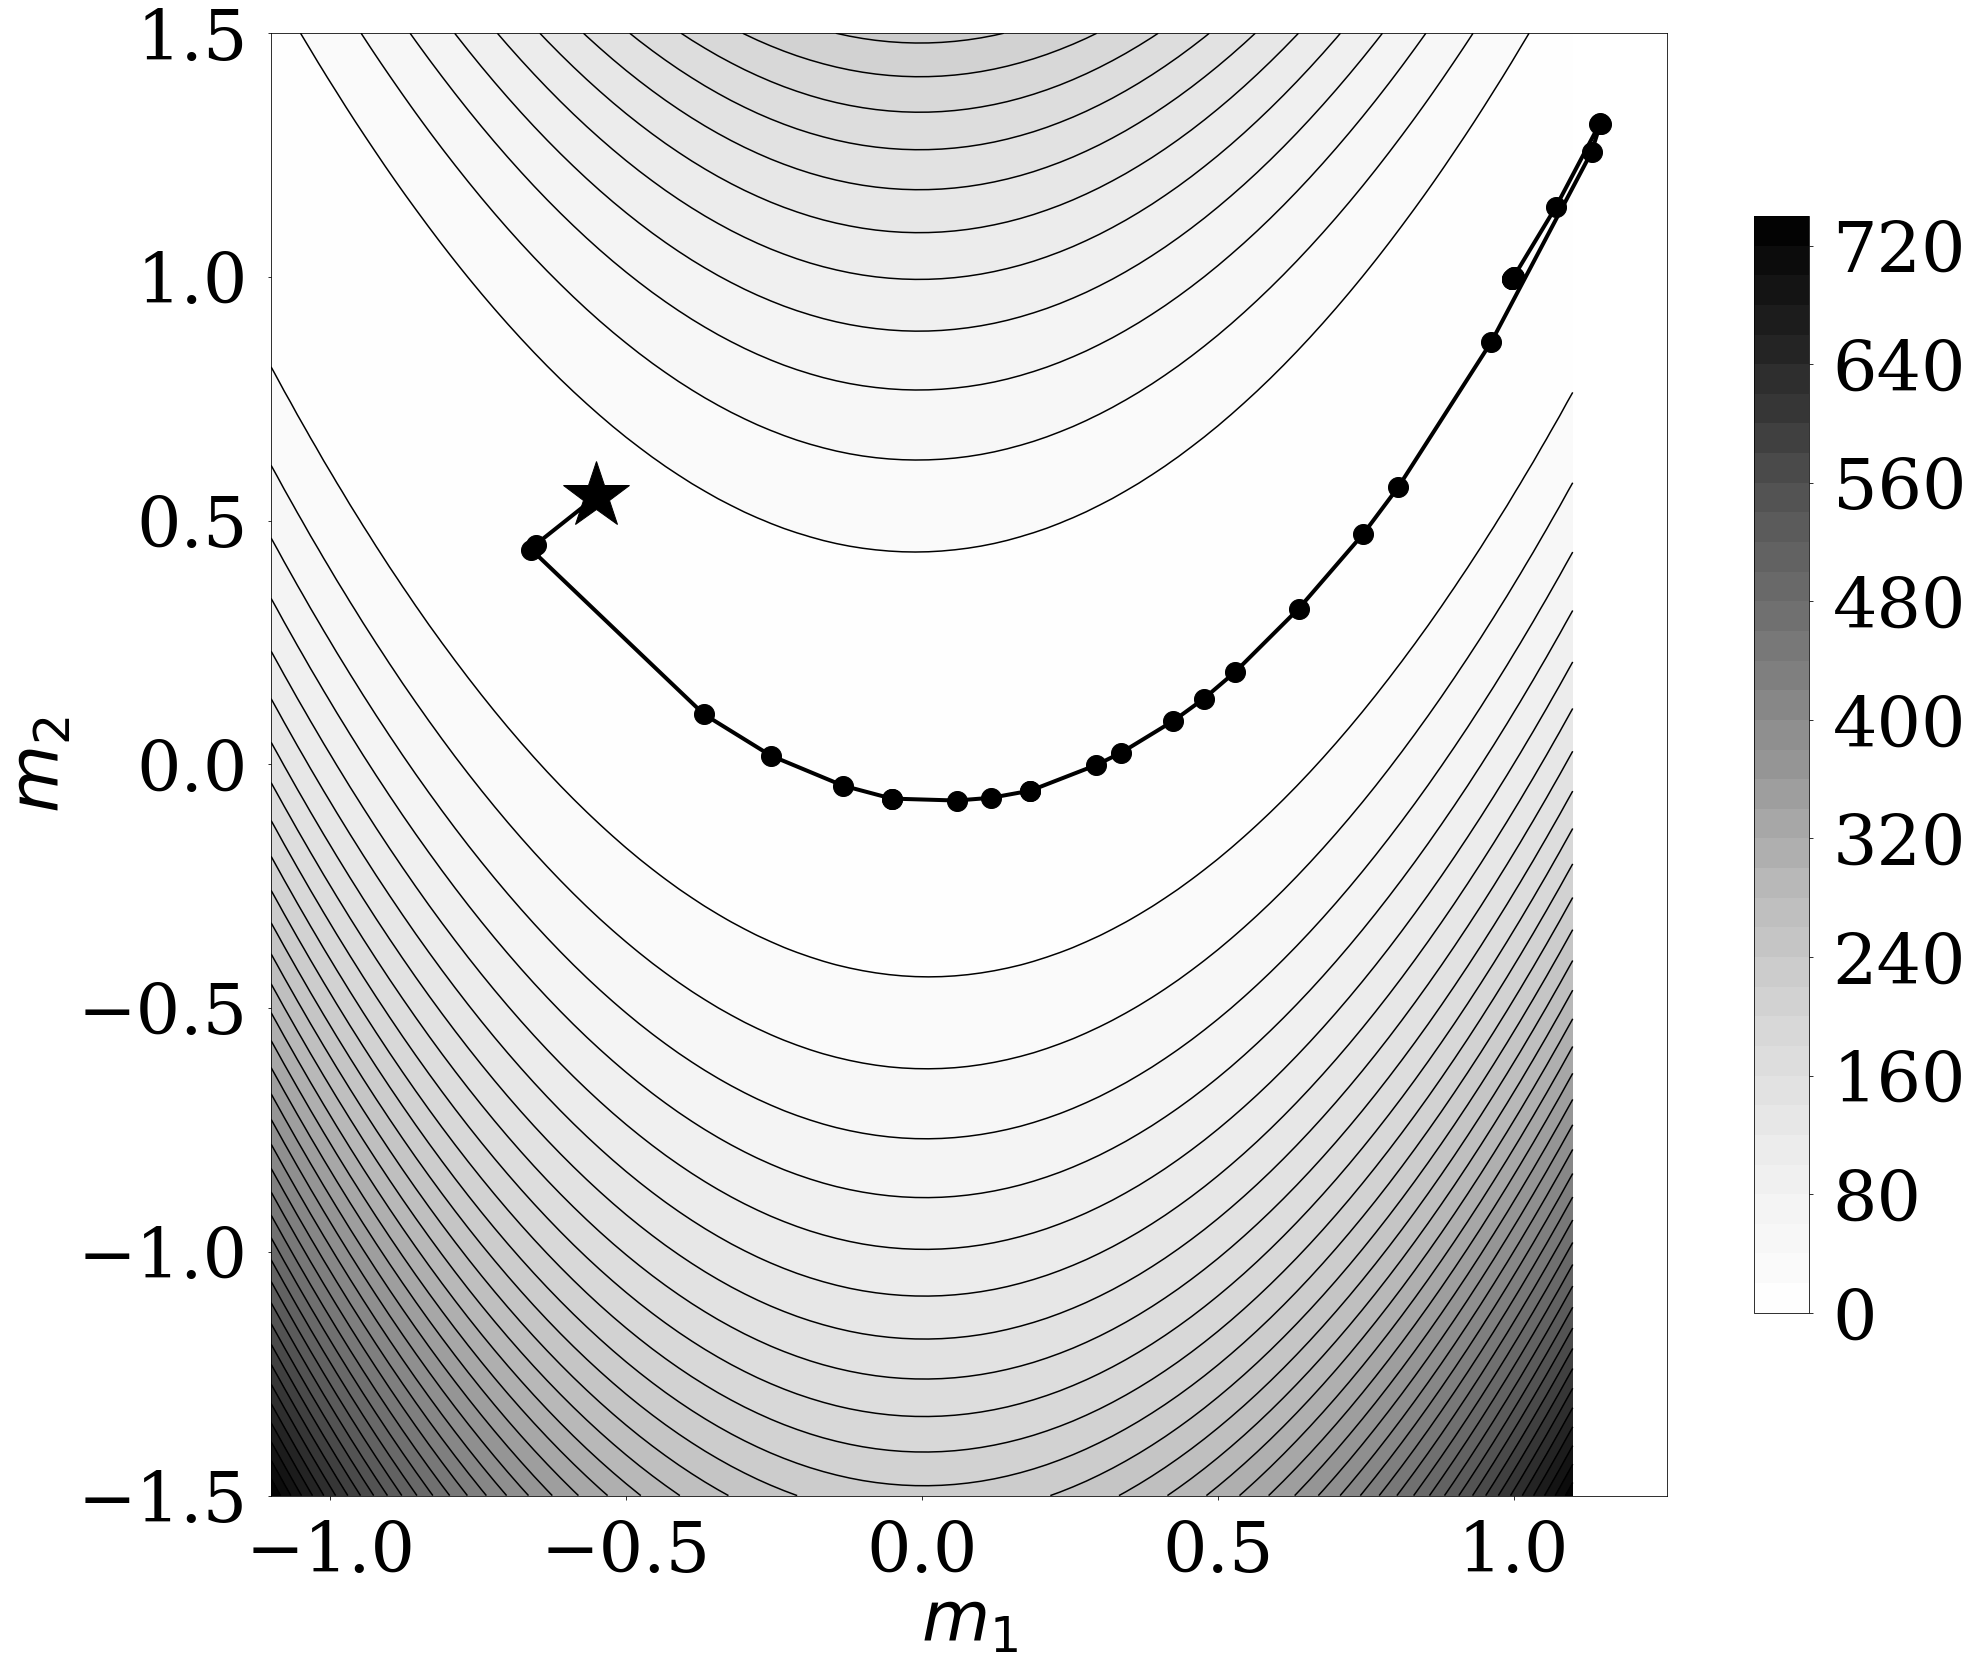

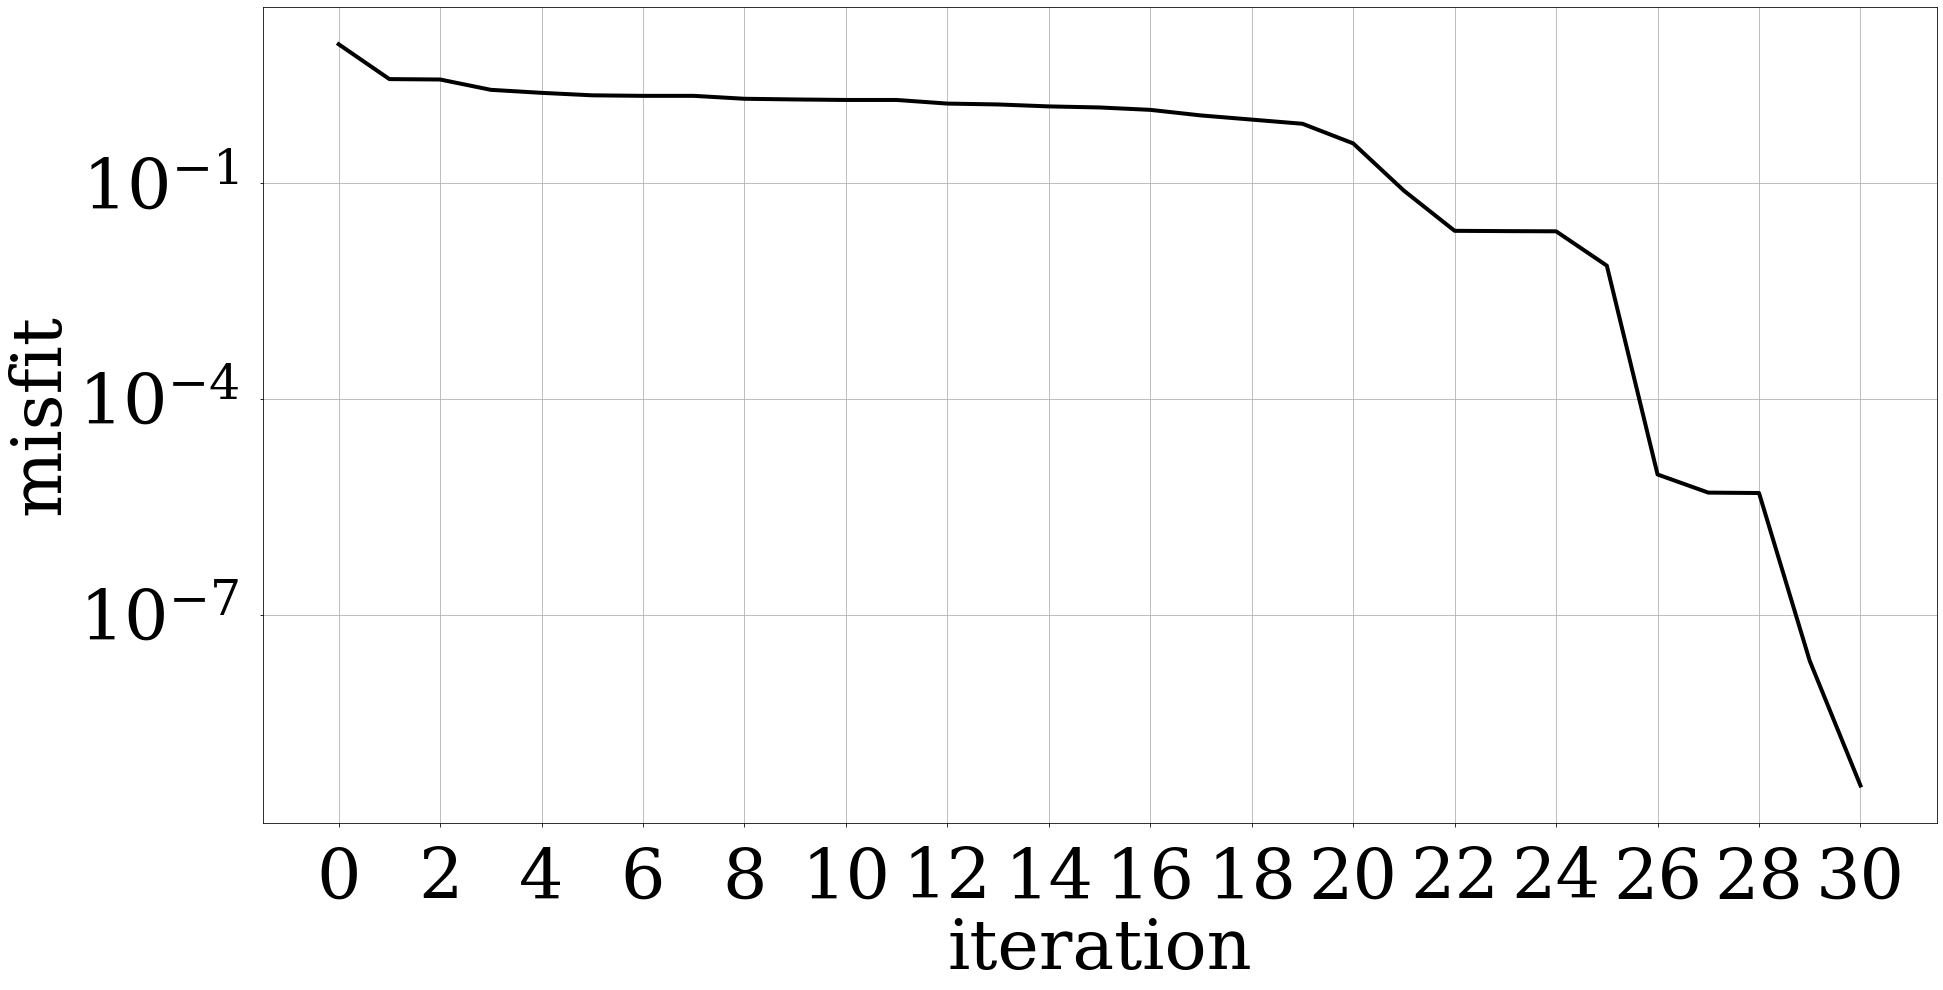

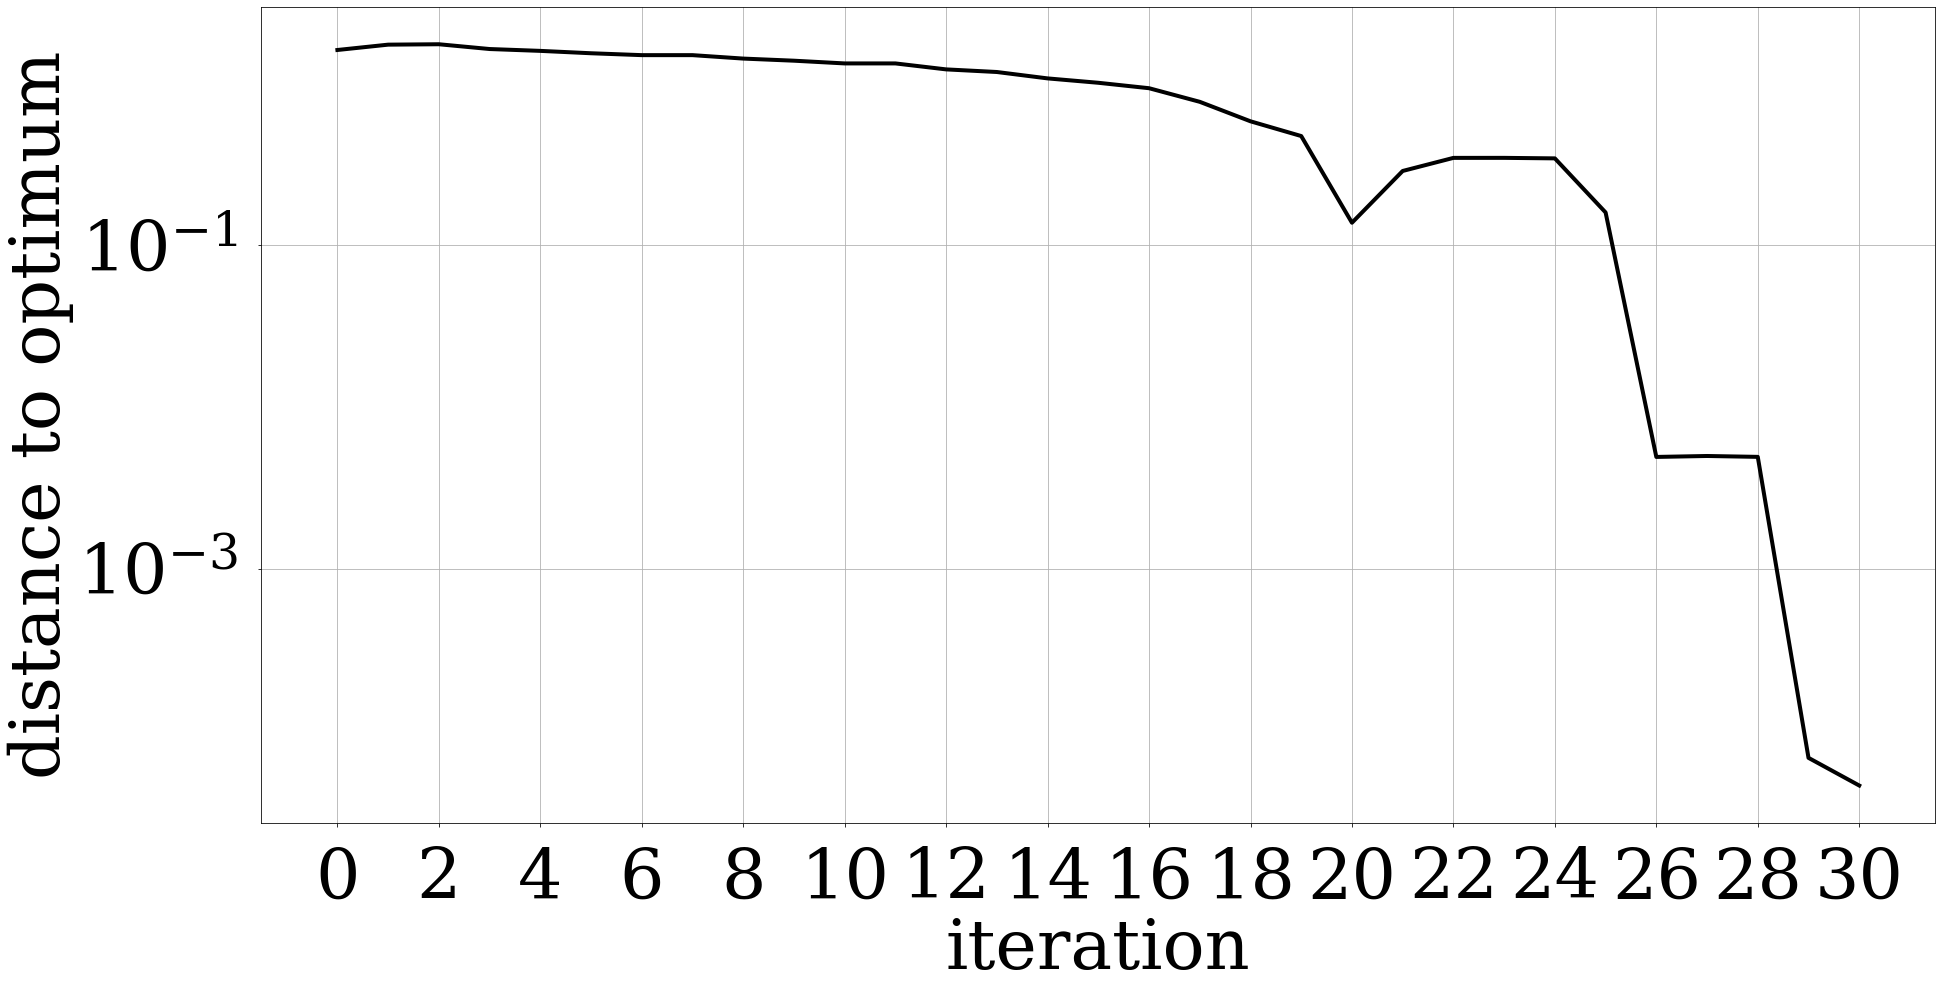

In [53]:
# Initialise coordinates and misfit. --------------------
x = np.matrix([[x0], [y0]])
chi_fr = np.zeros(nit + 1)
chi_fr[0] = f.f(x[0, 0], x[1, 0], function)
diff_fr = np.zeros(nit + 1)
diff_fr[0] = np.linalg.norm(x - opt)
plt.subplots(1, figsize=(30, 25))
plt.plot(x[0, 0], x[1, 0], "k*", markersize=70)
if print_misfit:
    print("iteration=0, misfit=%f" % chi_fr[0])

s = s_min

# Iterate. ----------------------------------------------
for it in range(nit):

    if it == 0:
        J = f.J(x[0, 0], x[1, 0], function)
        h = -J

    x_new, chi_fr[it + 1], s_opt = line_search(x, h, s, function, ls_method)
    if s_opt == 0.0:
        s = s / 2.0
    J_new = f.J(x_new[0, 0], x_new[1, 0], function)
    beta = float((J_new.T * J_new) / (J.T * J))
    h = -J_new + beta * h

    plt.plot(x_new[0, 0], x_new[1, 0], "ko", markersize=20)
    plt.plot((x[0, 0], x_new[0, 0]), (x[1, 0], x_new[1, 0]), "k", linewidth=4)

    J = J_new
    x = x_new

    diff_fr[it + 1] = np.linalg.norm(x - opt)

    if print_misfit:
        print("iteration=%d, misfit=%f" % (it + 1, chi_fr[it + 1]))

# Plot trajectory. --------------------------------------
f.f(xp, yp, function, plot=True)
plt.tight_layout()
if save_figure == True:
    plt.savefig("path_cgfr.pdf", format="pdf")
plt.show()

plt.subplots(1, figsize=(30, 15))
plt.semilogy(np.arange(0, nit + 1), chi_fr, "k", linewidth=4)
plt.xticks(np.arange(0, nit + 1, 2))
plt.xlabel("iteration")
plt.ylabel("misfit")
plt.grid()
if save_figure == True:
    plt.savefig("misfit_cgfr.pdf", format="pdf")
plt.show()

plt.subplots(1, figsize=(30, 15))
plt.semilogy(np.arange(0, nit + 1), diff_fr, "k", linewidth=4)
plt.xticks(np.arange(0, nit + 1, 2))
plt.xlabel("iteration")
plt.ylabel("distance to optimum")
plt.grid()
if save_figure == True:
    plt.savefig("distance_cgfr.pdf", format="pdf")
plt.show()

## 6. Conjugate gradients (Polak-Ribiere)

iteration=0, misfit=8.528125
iteration=1, misfit=2.793831
iteration=2, misfit=2.620777
iteration=3, misfit=2.532709
iteration=4, misfit=2.048833
iteration=5, misfit=1.924078
iteration=6, misfit=0.849526
iteration=7, misfit=0.821258
iteration=8, misfit=0.608338
iteration=9, misfit=0.394439
iteration=10, misfit=0.299011
iteration=11, misfit=0.188547
iteration=12, misfit=0.112404
iteration=13, misfit=0.078563
iteration=14, misfit=0.051188
iteration=15, misfit=0.043237
iteration=16, misfit=0.024822
iteration=17, misfit=0.003940
iteration=18, misfit=0.000507
iteration=19, misfit=0.000063
iteration=20, misfit=0.000004
iteration=21, misfit=0.000001
iteration=22, misfit=0.000000
iteration=23, misfit=0.000000
iteration=24, misfit=0.000000
minimum step length too long
iteration=25, misfit=0.000000
iteration=26, misfit=0.000000
iteration=27, misfit=0.000000
iteration=28, misfit=0.000000
iteration=29, misfit=0.000000
iteration=30, misfit=0.000000


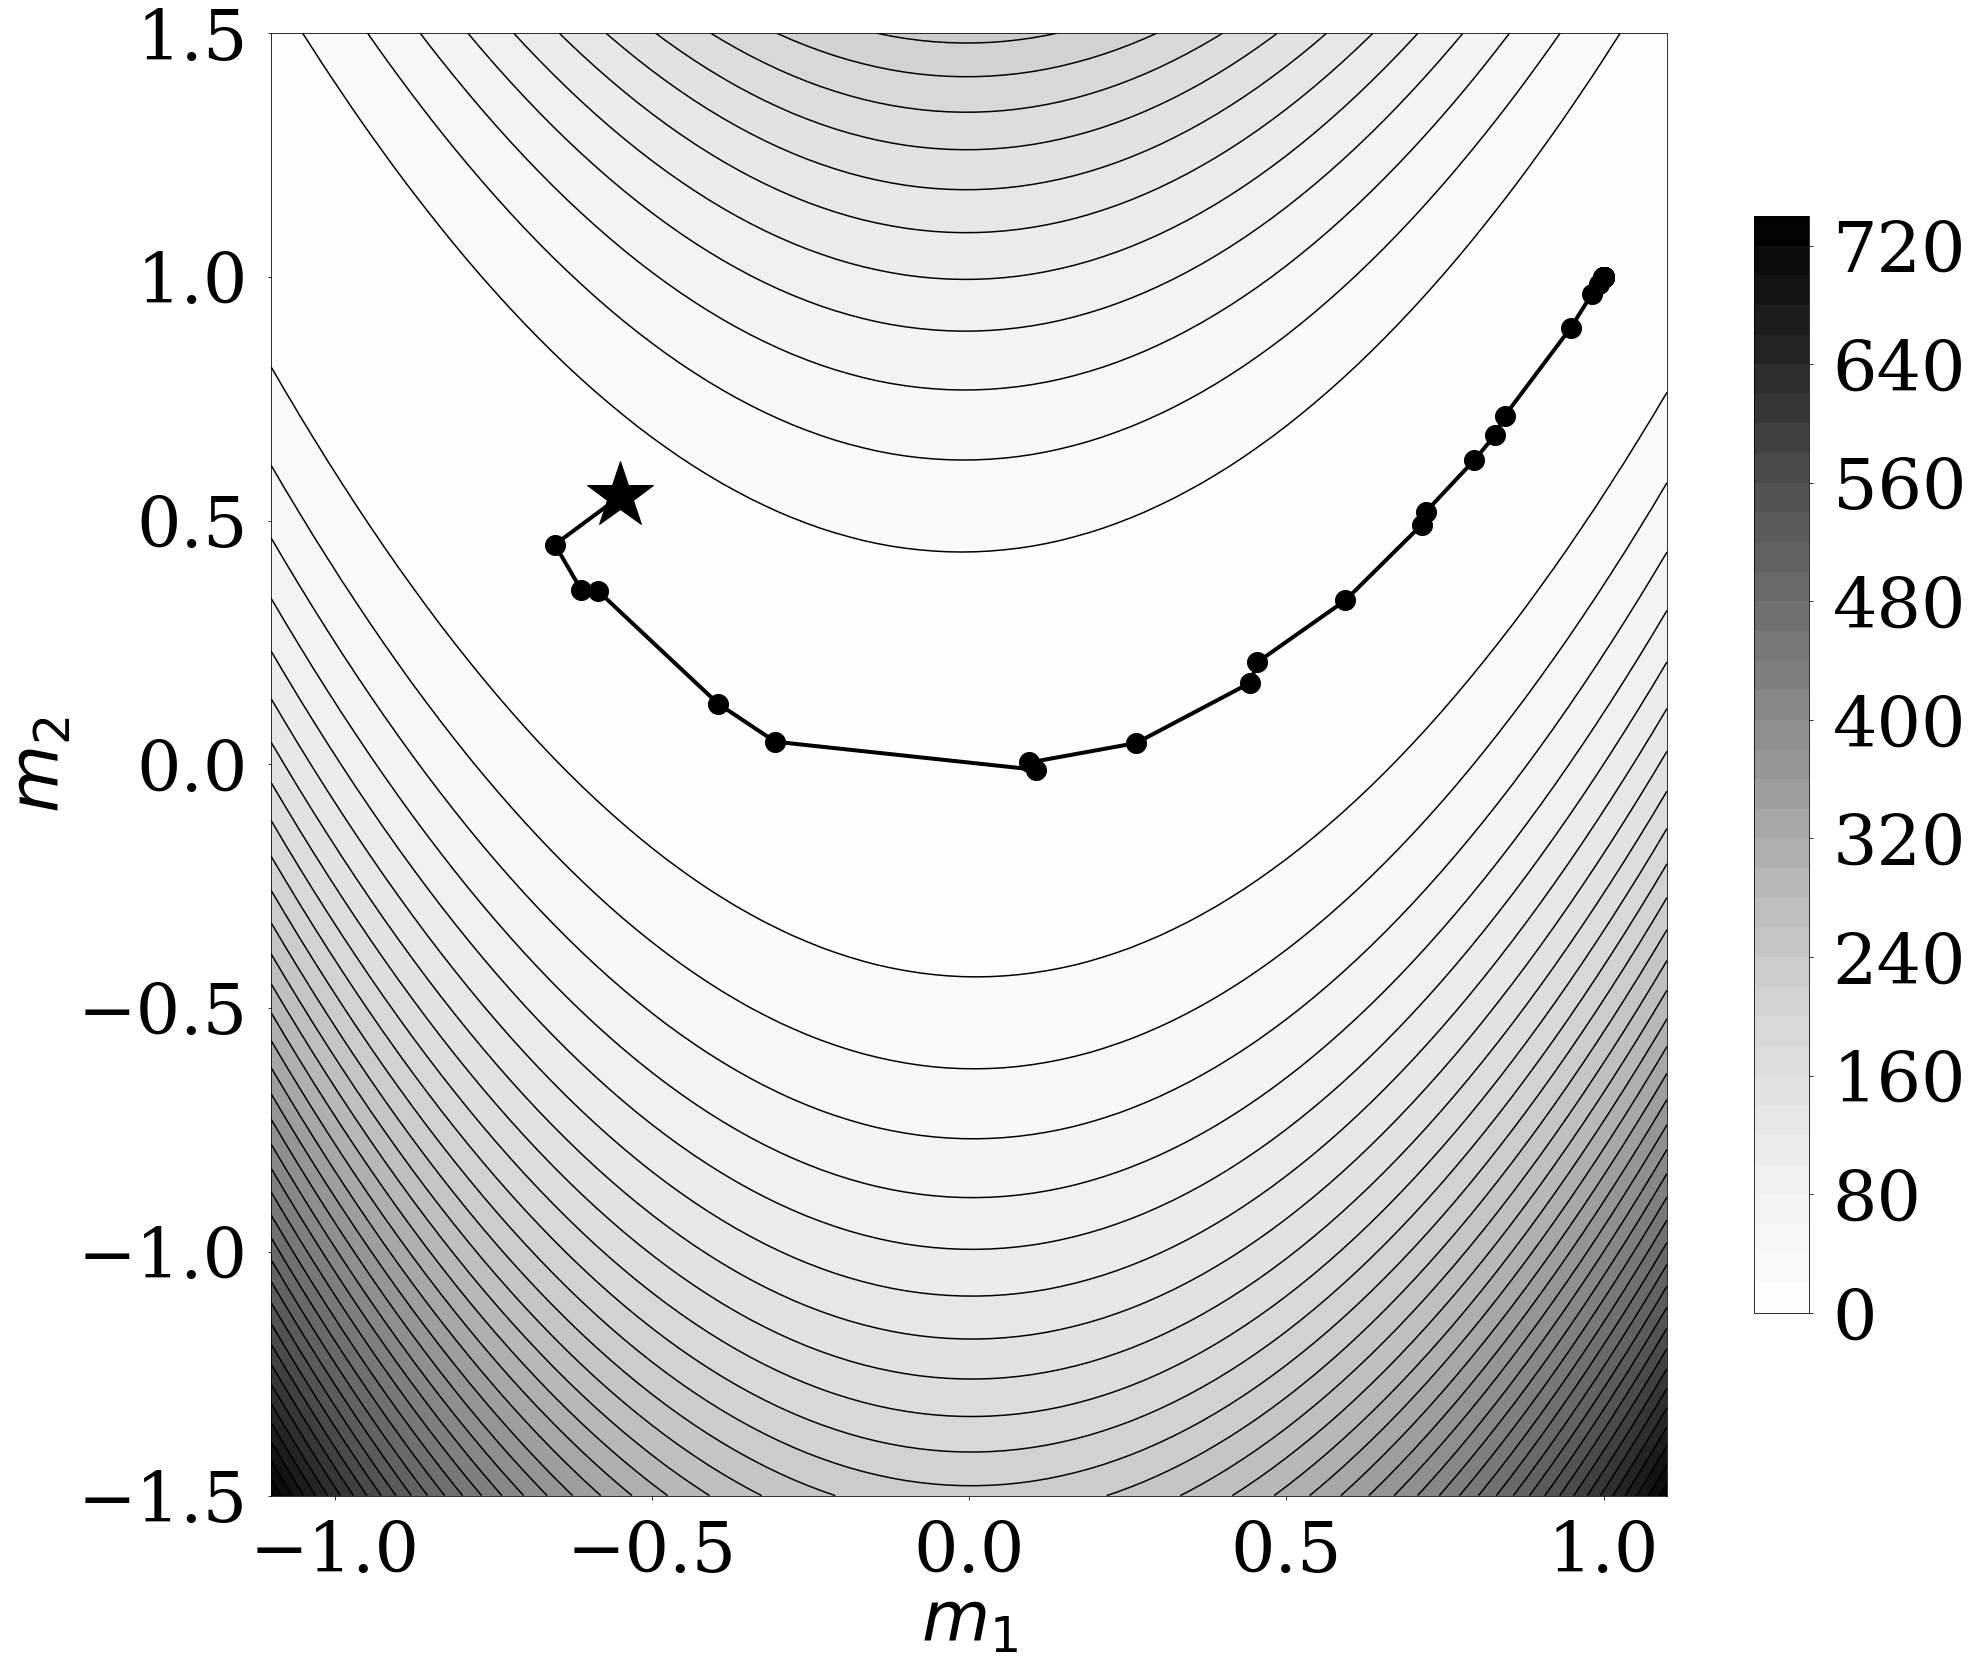

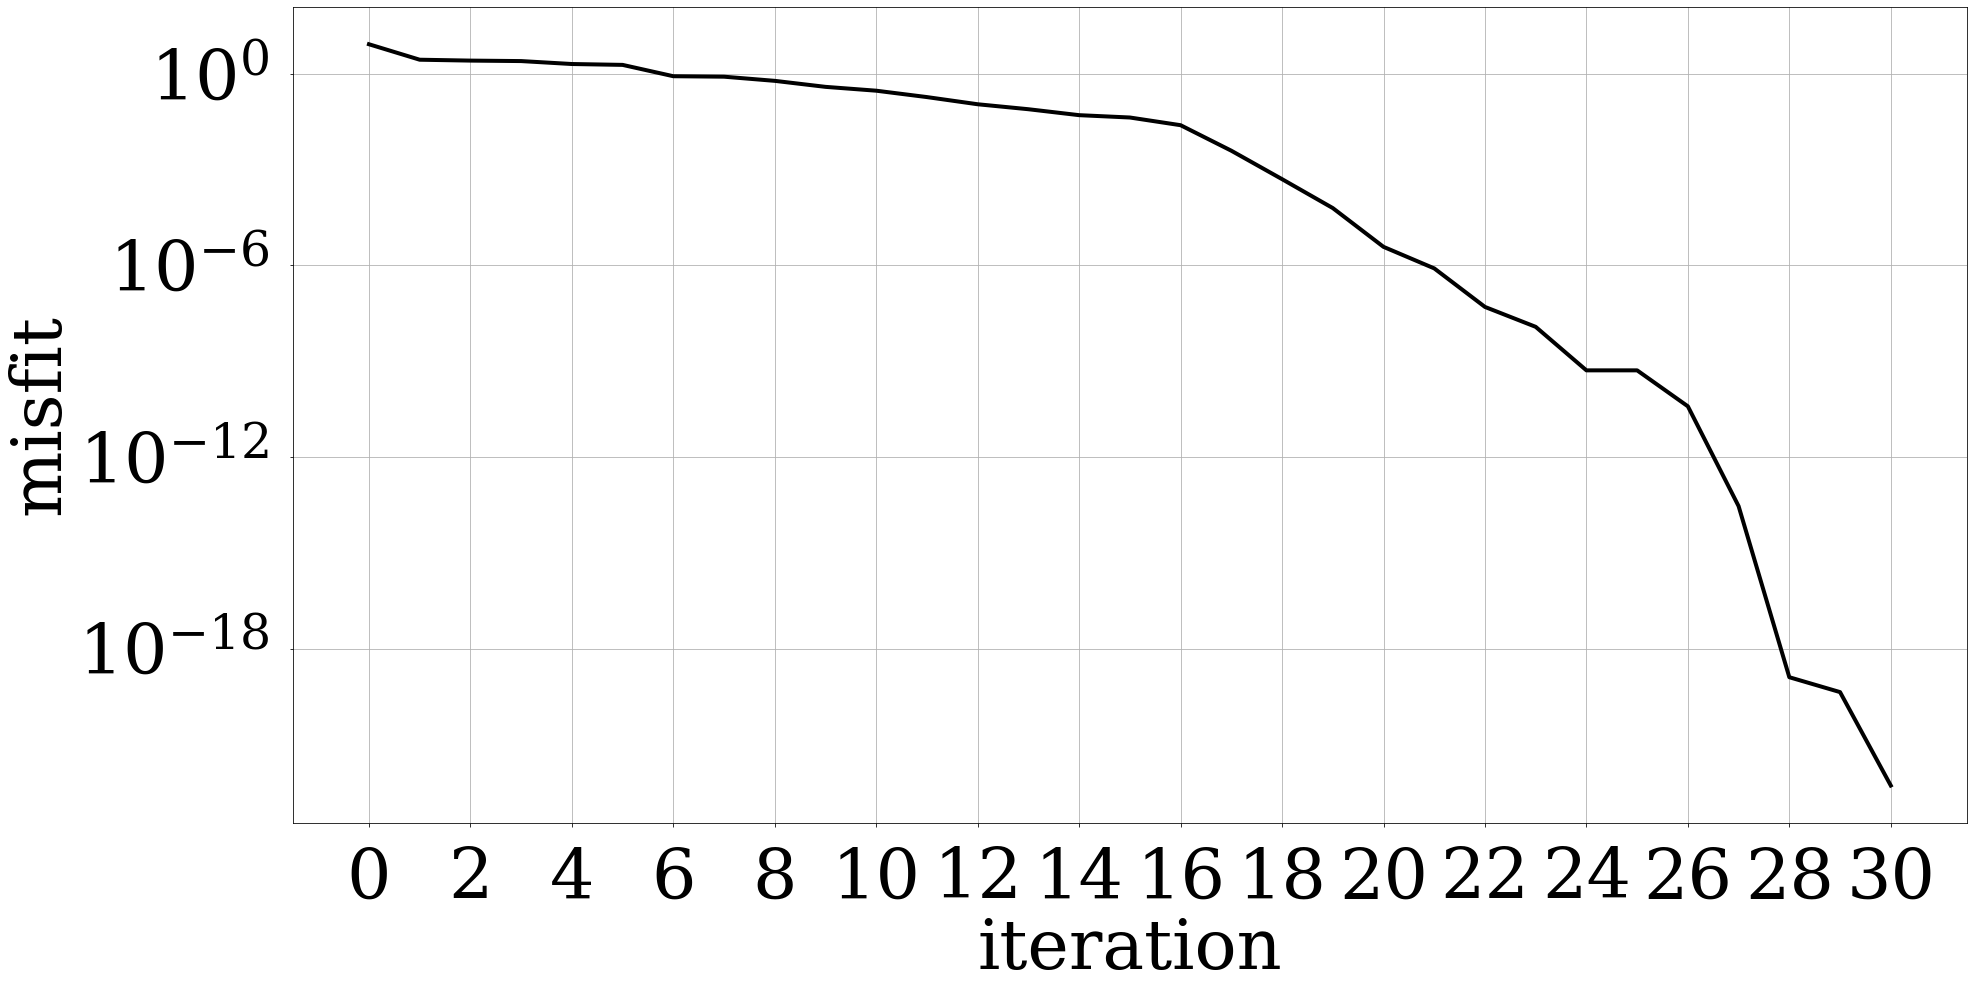

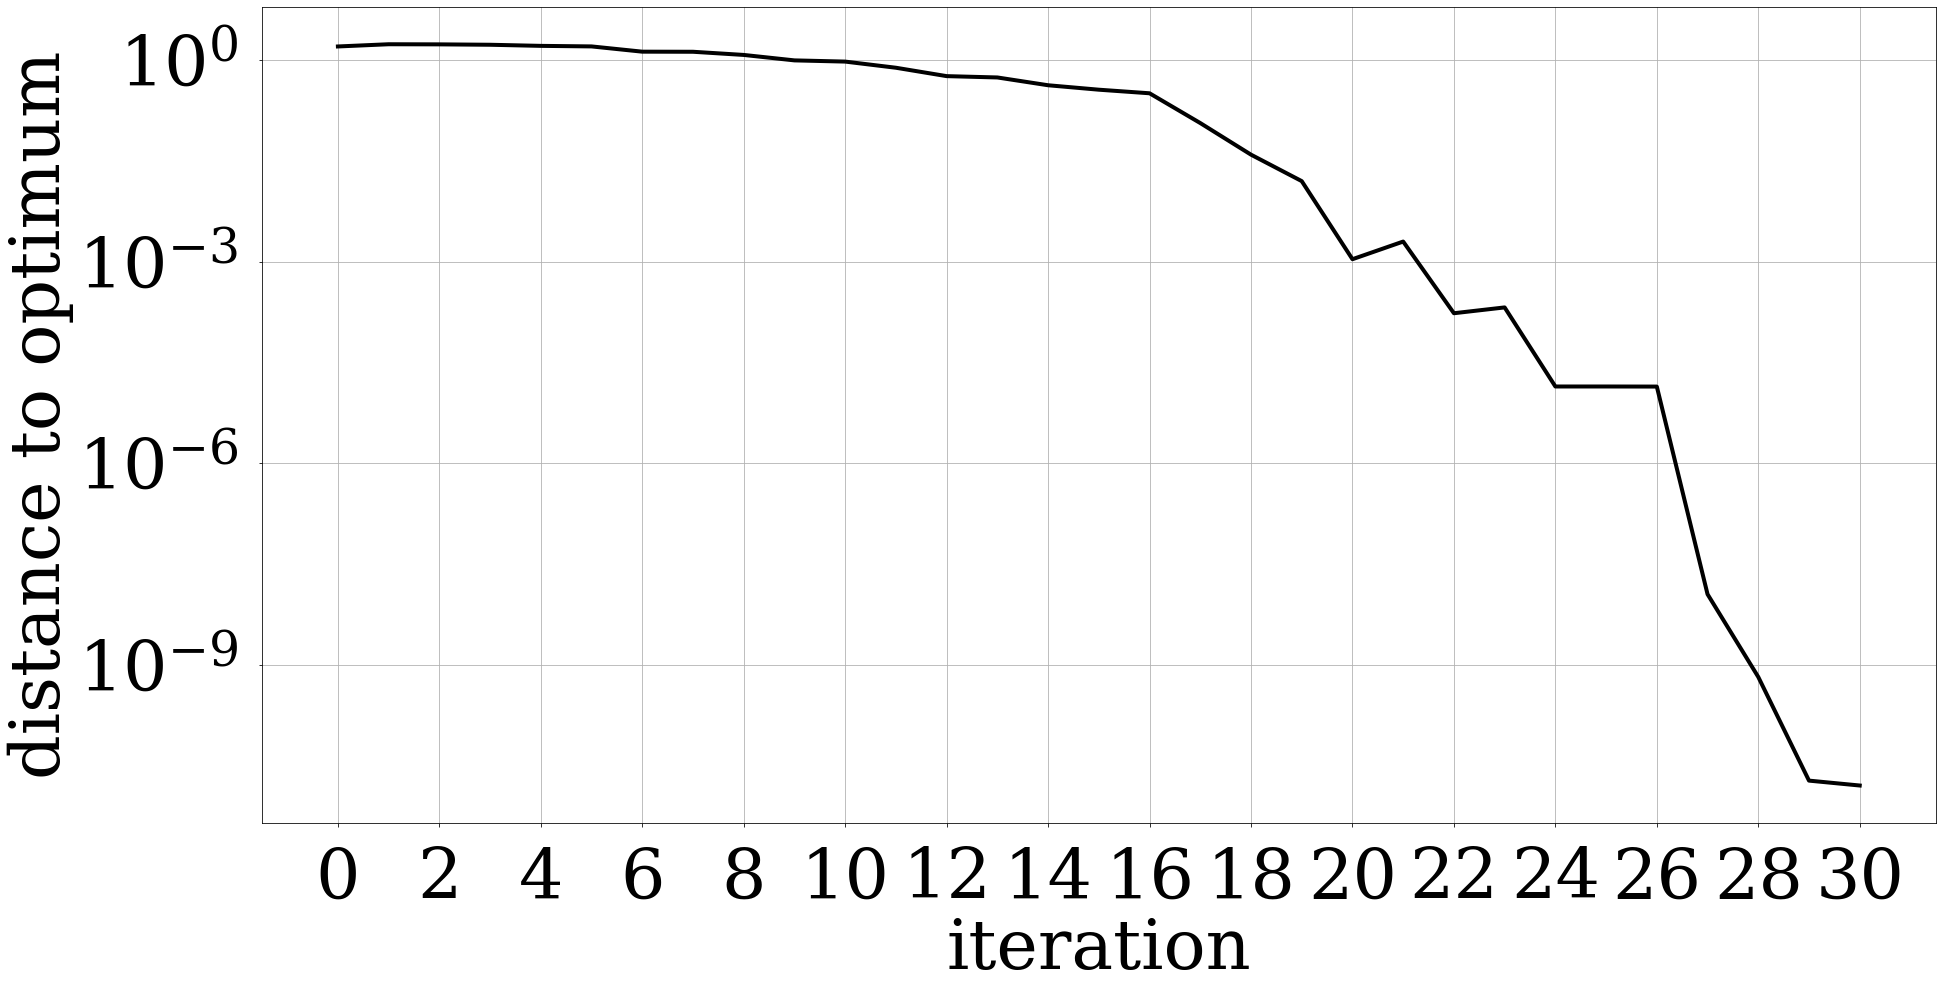

In [54]:
# Initialise coordinates and misfit. --------------------
x = np.matrix([[x0], [y0]])
chi_pr = np.zeros(nit + 1)
chi_pr[0] = f.f(x[0, 0], x[1, 0], function)
diff_pr = np.zeros(nit + 1)
diff_pr[0] = np.linalg.norm(x - opt)
plt.subplots(1, figsize=(30, 25))
plt.plot(x[0, 0], x[1, 0], "k*", markersize=70)
if print_misfit:
    print("iteration=0, misfit=%f" % chi_pr[0])

s = s_min

# Iterate. ----------------------------------------------
for it in range(nit):

    if it == 0:
        J = f.J(x[0, 0], x[1, 0], function)
        h = -J

    x_new, chi_pr[it + 1], s_opt = line_search(x, h, s, function, ls_method)
    if s_opt == 0.0:
        s = s / 2.0
    J_new = f.J(x_new[0, 0], x_new[1, 0], function)
    beta = float((J_new.T * (J_new - J)) / (J.T * J))
    h = -J_new + beta * h

    plt.plot(x_new[0, 0], x_new[1, 0], "ko", markersize=20)
    plt.plot((x[0, 0], x_new[0, 0]), (x[1, 0], x_new[1, 0]), "k", linewidth=4)

    J = J_new
    x = x_new

    diff_pr[it + 1] = np.linalg.norm(x - opt)

    if print_misfit:
        print("iteration=%d, misfit=%f" % (it + 1, chi_pr[it + 1]))

# Plot trajectory. --------------------------------------
f.f(xp, yp, function, plot=True)
plt.tight_layout()
if save_figure == True:
    plt.savefig("path_cgpr.pdf", format="pdf")
plt.show()

plt.subplots(1, figsize=(30, 15))
plt.semilogy(np.arange(0, nit + 1), chi_pr, "k", linewidth=4)
plt.xticks(np.arange(0, nit + 1, 2))
plt.xlabel("iteration")
plt.ylabel("misfit")
plt.grid()
if save_figure == True:
    plt.savefig("misfit_cgpr.pdf", format="pdf")
plt.show()

plt.subplots(1, figsize=(30, 15))
plt.semilogy(np.arange(0, nit + 1), diff_pr, "k", linewidth=4)
plt.xticks(np.arange(0, nit + 1, 2))
plt.xlabel("iteration")
plt.ylabel("distance to optimum")
plt.grid()
if save_figure == True:
    plt.savefig("distance_cgpr.pdf", format="pdf")
plt.show()

## 7. Conjugate gradients (Hestenes-Stiefel)

iteration=0, misfit=8.528125
iteration=1, misfit=2.793831
iteration=2, misfit=1.728504
iteration=3, misfit=1.718069
iteration=4, misfit=1.296796
iteration=5, misfit=1.056320
iteration=6, misfit=0.826091
iteration=7, misfit=0.693671
iteration=8, misfit=0.453850
iteration=9, misfit=0.333336
iteration=10, misfit=0.291206
iteration=11, misfit=0.063163
iteration=12, misfit=0.056562
iteration=13, misfit=0.029340
iteration=14, misfit=0.003993
minimum step length too long
iteration=15, misfit=0.003993
iteration=16, misfit=0.003993
iteration=17, misfit=0.003993
iteration=18, misfit=0.003993
iteration=19, misfit=0.003993
iteration=20, misfit=0.003993
iteration=21, misfit=0.003993
iteration=22, misfit=0.003993
iteration=23, misfit=0.003993
iteration=24, misfit=0.003993
iteration=25, misfit=0.003993
iteration=26, misfit=0.003993
iteration=27, misfit=0.003993
iteration=28, misfit=0.003993
iteration=29, misfit=0.003993
iteration=30, misfit=0.003993


/tmp/ipykernel_7800/508269353.py:25: RuntimeWarning: invalid value encountered in true_divide
  beta = float((J_new.T * (J_new - J)) / (h.T * (J_new - J)))


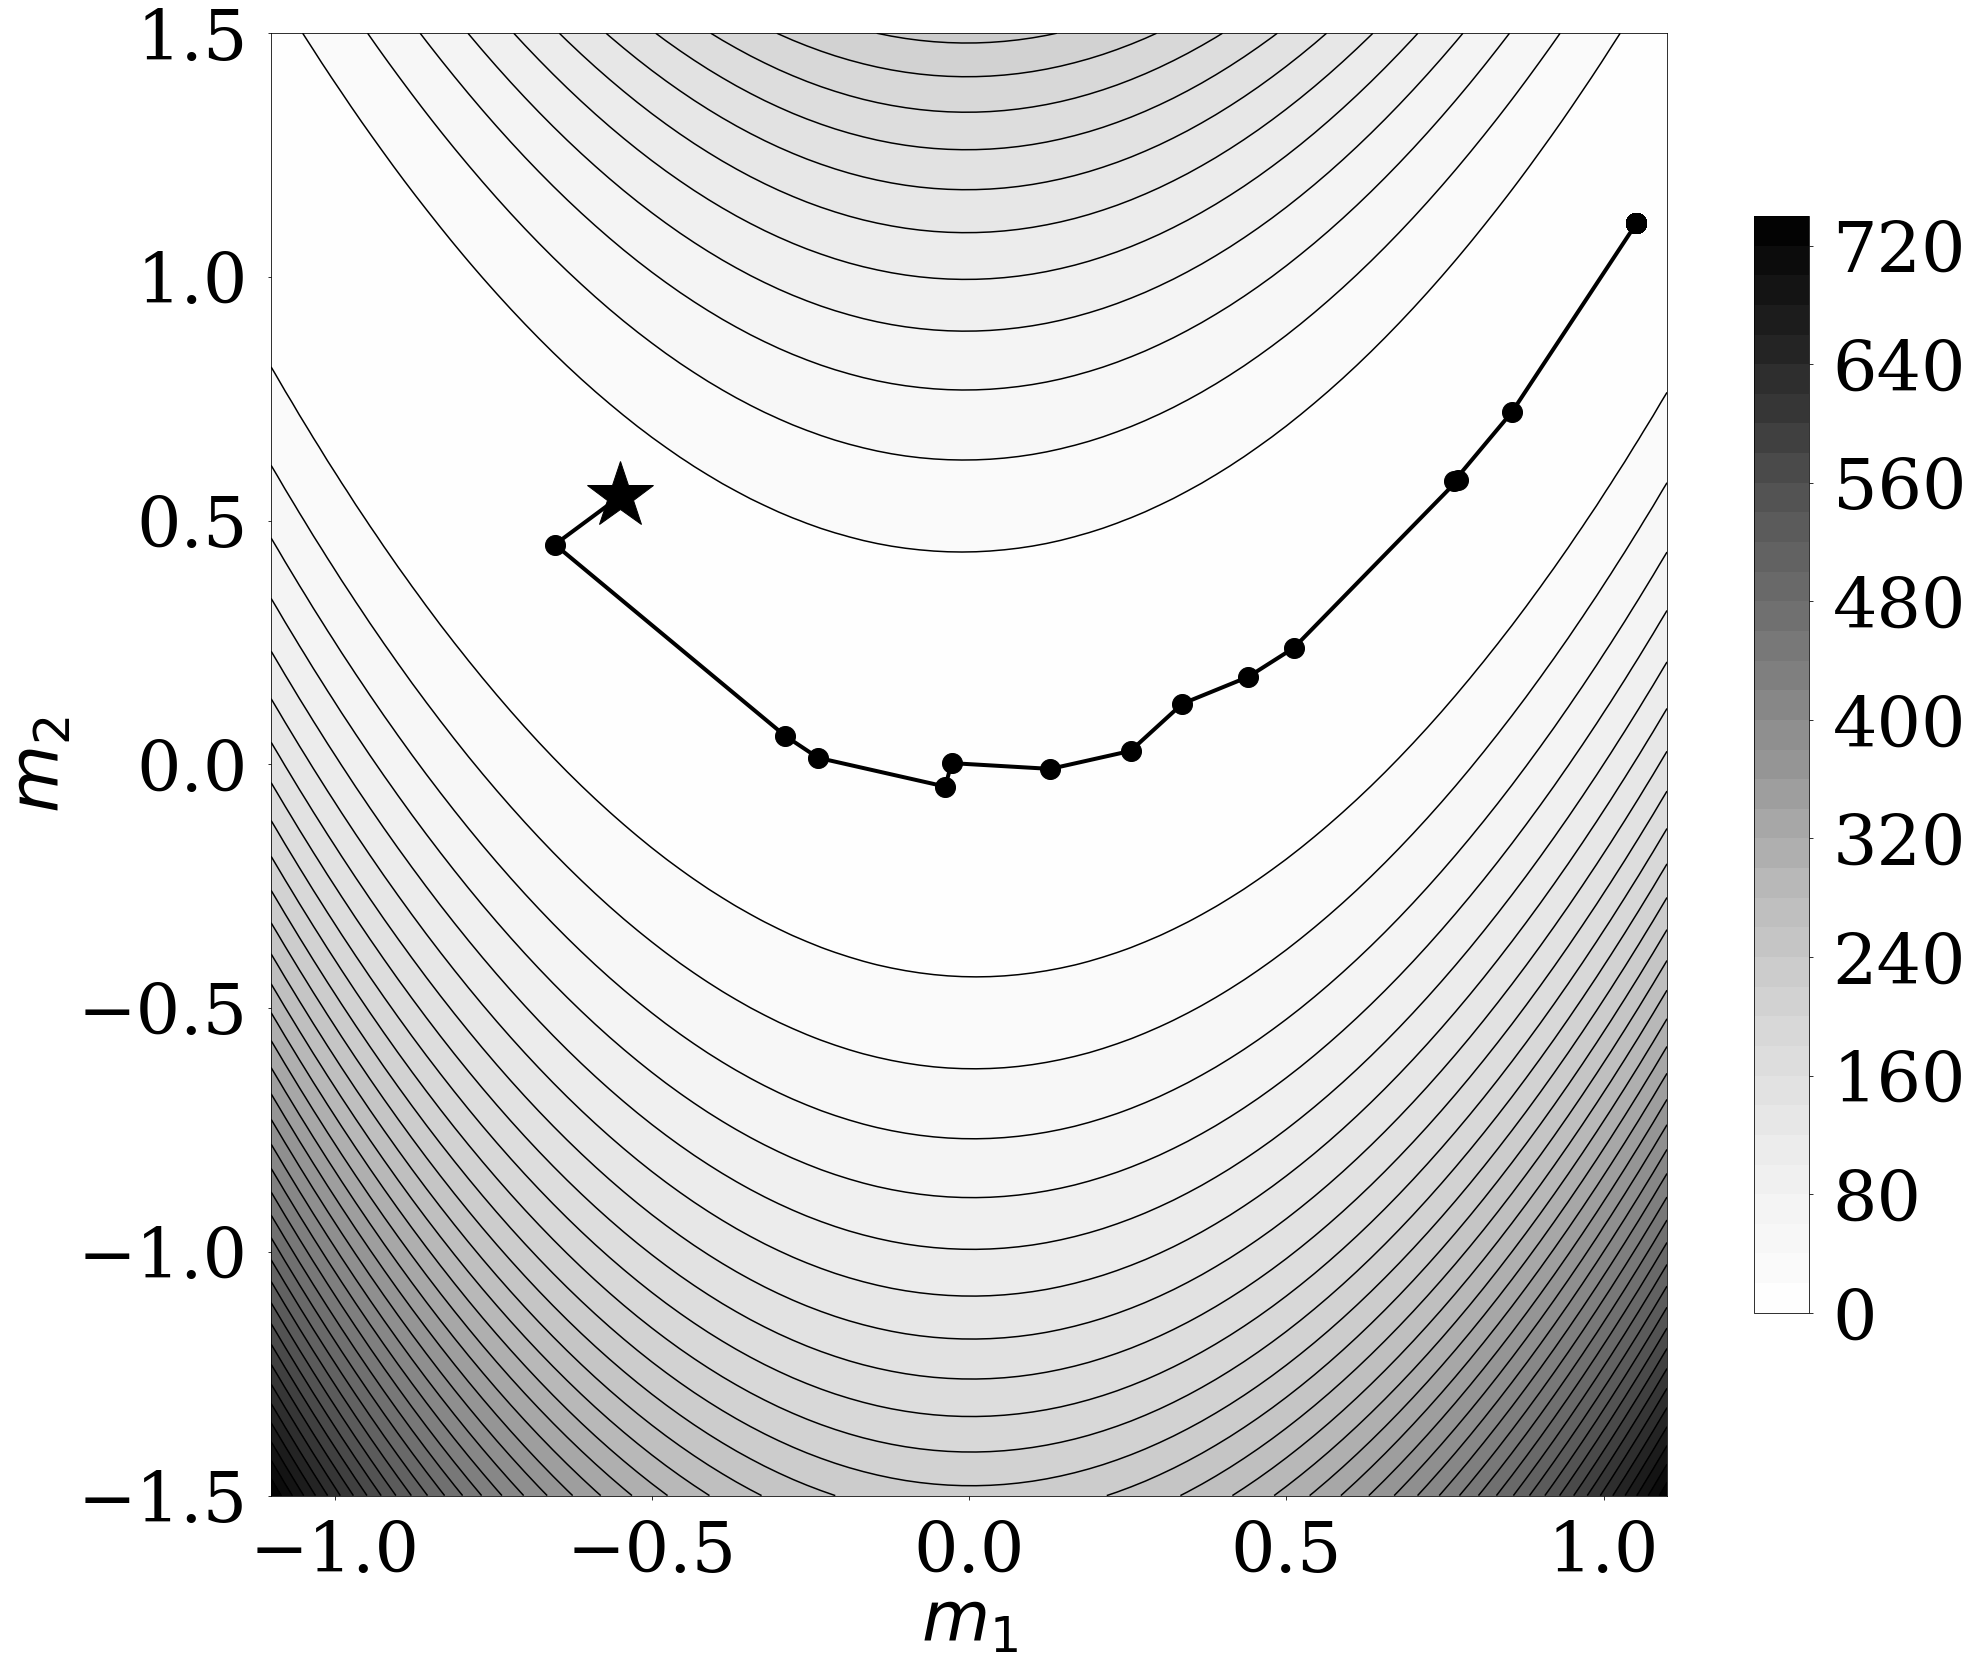

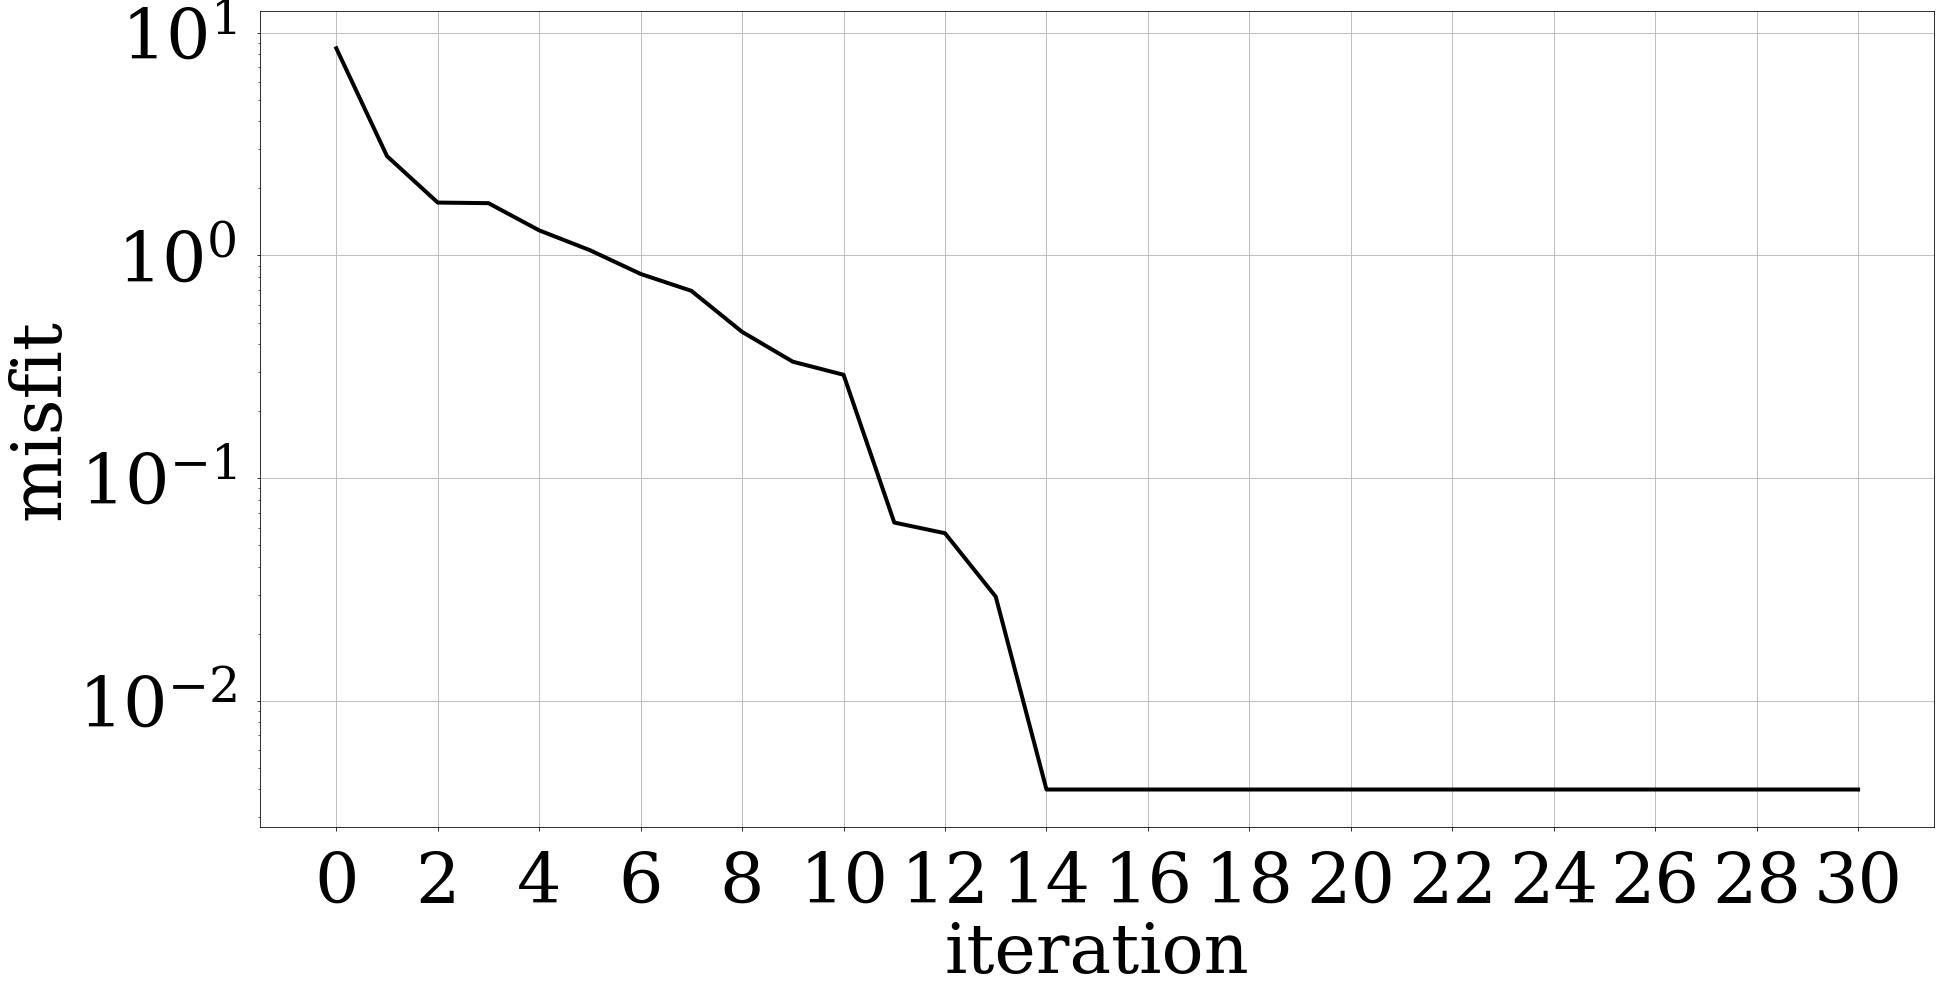

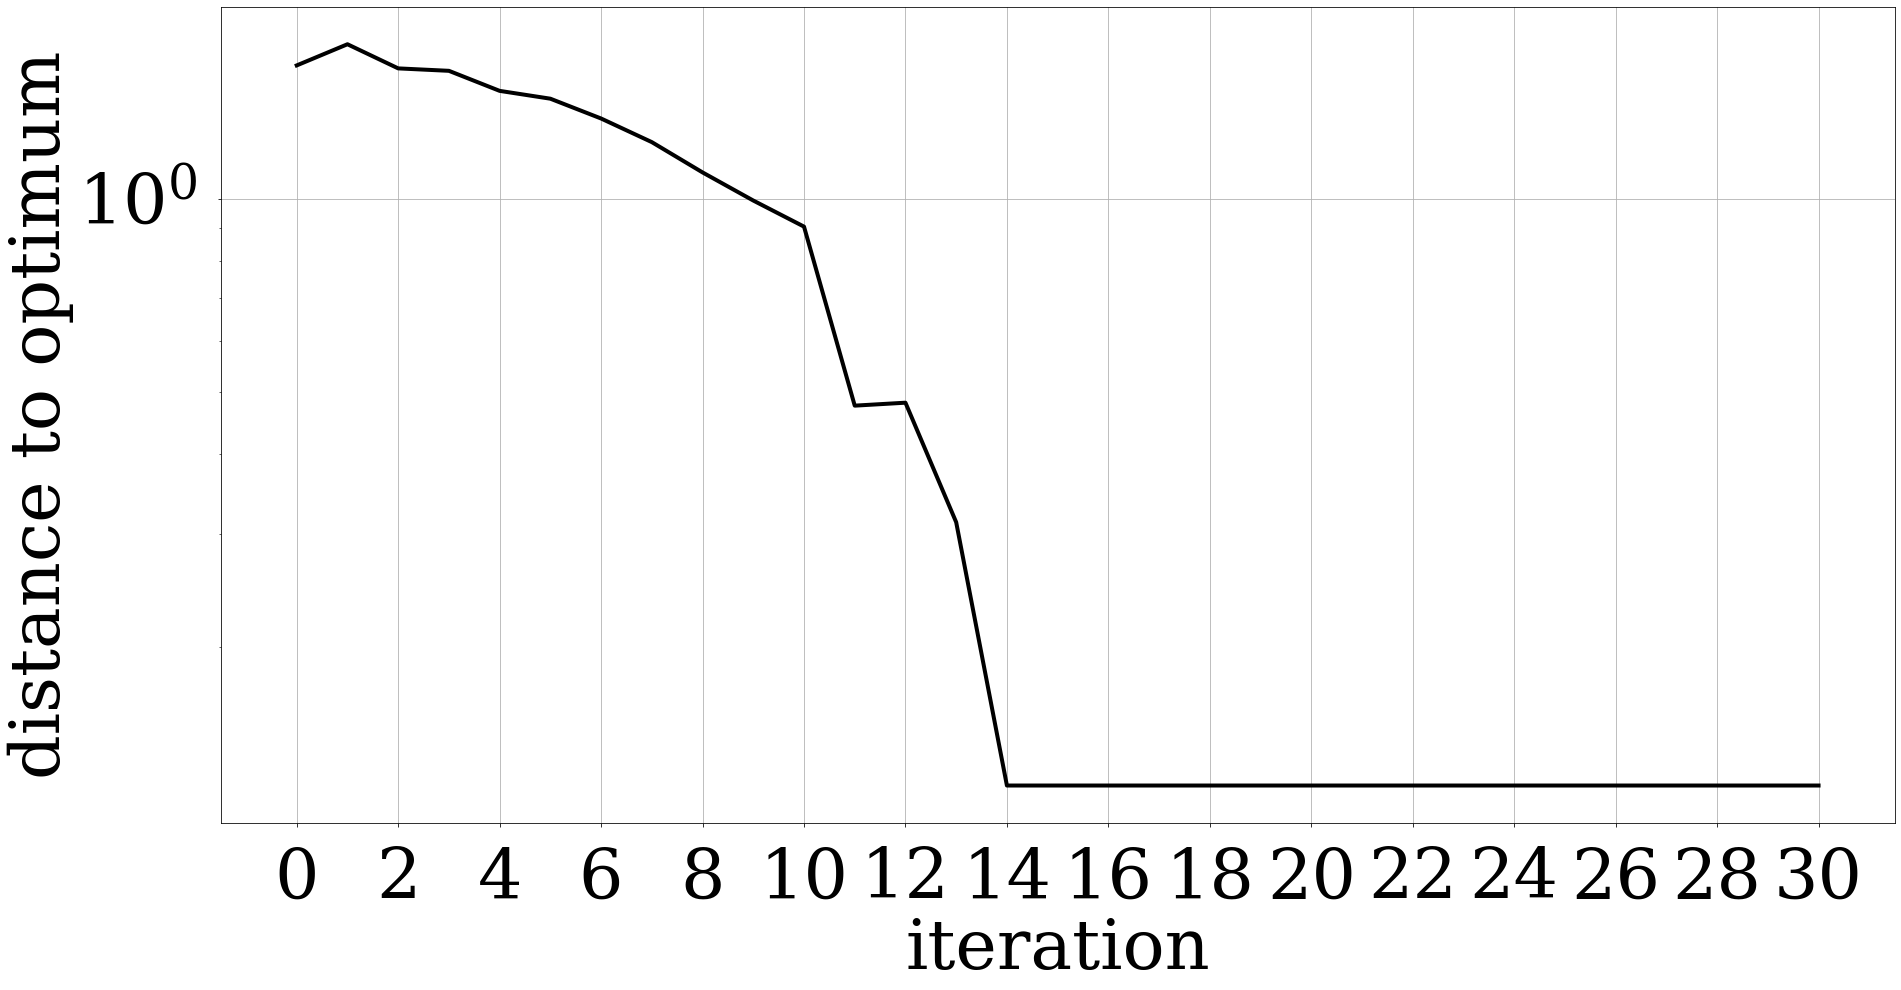

In [56]:
# Initialise coordinates and misfit. --------------------
x = np.matrix([[x0], [y0]])
chi_hs = np.zeros(nit + 1)
chi_hs[0] = f.f(x[0, 0], x[1, 0], function)
diff_hs = np.zeros(nit + 1)
diff_hs[0] = np.linalg.norm(x - opt)
plt.subplots(1, figsize=(30, 25))
plt.plot(x[0, 0], x[1, 0], "k*", markersize=70)
if print_misfit:
    print("iteration=0, misfit=%f" % chi_hs[0])

s = s_min

# Iterate. ----------------------------------------------
for it in range(nit):

    if it == 0:
        J = f.J(x[0, 0], x[1, 0], function)
        h = -J

    x_new, chi_hs[it + 1], s_opt = line_search(x, h, s, function, ls_method)
    if s_opt == 0.0:
        s = s / 2.0
    J_new = f.J(x_new[0, 0], x_new[1, 0], function)
    beta = float((J_new.T * (J_new - J)) / (h.T * (J_new - J)))
    h = -J_new + beta * h

    plt.plot(x_new[0, 0], x_new[1, 0], "ko", markersize=20)
    plt.plot((x[0, 0], x_new[0, 0]), (x[1, 0], x_new[1, 0]), "k", linewidth=4)

    J = J_new
    x = x_new

    diff_hs[it + 1] = np.linalg.norm(x - opt)

    if print_misfit:
        print("iteration=%d, misfit=%f" % (it + 1, chi_hs[it + 1]))

# Plot trajectory. --------------------------------------
f.f(xp, yp, function, plot=True)
plt.tight_layout()
if save_figure == True:
    plt.savefig("path_cghs.pdf", format="pdf")
plt.show()

plt.subplots(1, figsize=(30, 15))
plt.semilogy(np.arange(0, nit + 1), chi_hs, "k", linewidth=4)
plt.xticks(np.arange(0, nit + 1, 2))
plt.xlabel("iteration")
plt.ylabel("misfit")
plt.grid()
if save_figure == True:
    plt.savefig("misfit_cghs.pdf", format="pdf")
plt.show()

plt.subplots(1, figsize=(30, 15))
plt.semilogy(np.arange(0, nit + 1), diff_hs, "k", linewidth=4)
plt.xticks(np.arange(0, nit + 1, 2))
plt.xlabel("iteration")
plt.ylabel("distance to optimum")
plt.grid()
if save_figure == True:
    plt.savefig("distance_cghs.pdf", format="pdf")
plt.show()

## 8. BFGS

In [ ]:
# Initialise coordinates and misfit. --------------------
x = np.matrix([[x0], [y0]])
A = np.identity(2)
I = np.identity(2)
chi_bfgs = np.zeros(nit + 1)
chi_bfgs[0] = f.f(x[0, 0], x[1, 0], function)
diff_bfgs = np.zeros(nit + 1)
diff_bfgs[0] = np.linalg.norm(x - opt)
plt.subplots(1, figsize=(30, 25))
plt.plot(x[0, 0], x[1, 0], "k*", markersize=70)
if print_misfit:
    print("iteration=0, misfit=%f" % chi[0])

s = s_min

# Iterate. ----------------------------------------------
for it in range(nit):

    # Compute descent direction.
    J = f.J(x[0, 0], x[1, 0], function)
    h = -A * J

    # Compute update of position and of gradient
    x_new, chi_bfgs[it + 1], s_opt = line_search(x, h, s, function, ls_method)
    if s_opt == 0.0:
        s = s / 2.0
    J_new = f.J(x_new[0, 0], x_new[1, 0], function)

    # Compute position and gradient differences.
    b = x_new - x
    y = J_new - J

    # Update the matrix A.
    rho = float(1.0 / (y.T * b))
    A = (I - rho * b * y.T) * A * (I - rho * y * b.T) + rho * b * b.T

    # Plot next step of the trajectory.
    plt.plot(x_new[0, 0], x_new[1, 0], "ko", markersize=20)
    plt.plot((x[0, 0], x_new[0, 0]), (x[1, 0], x_new[1, 0]), "k", linewidth=4)

    # Move position and gradient to the next iteration.
    J = J_new
    x = x_new

    diff_bfgs[it + 1] = np.linalg.norm(x - opt)

    if print_misfit:
        print("iteration=%d, misfit=%f" % (it + 1, chi_bfgs[it + 1]))

# Plot trajectory. --------------------------------------
f.f(xp, yp, function, plot=True)
plt.tight_layout()
if save_figure == True:
    plt.savefig("path_bfgs.pdf", format="pdf")
plt.show()

plt.subplots(1, figsize=(30, 15))
plt.semilogy(np.arange(0, nit + 1), chi_bfgs, "k", linewidth=4)
plt.xticks(np.arange(0, nit + 1, 2))
plt.xlabel("iteration")
plt.ylabel("misfit")
plt.grid()
if save_figure == True:
    plt.savefig("misfit_bfgs.pdf", format="pdf")
plt.show()

np.save("chi_bfgs", chi_bfgs)

plt.subplots(1, figsize=(30, 15))
plt.semilogy(np.arange(0, nit + 1), diff_bfgs, "k", linewidth=4)
plt.xticks(np.arange(0, nit + 1, 2))
plt.xlabel("iteration")
plt.ylabel("distance to optimum")
plt.grid()
if save_figure == True:
    plt.savefig("distance_bfgs.pdf", format="pdf")
plt.show()

# Print correct and approximate inverse Hessians.
print("exact inverse Hessian in the final iteration:")
print(f.H(x[0, 0], x[1, 0], function))
print("approximate inverse Hessian in the final iteration")
print(np.linalg.inv(A))

## 9. L-BFGS

The L-BFGS method requires a little bit more algorithmic overhead. Before going to the iteration itself, we provide a Python class that stores the $k$ most recent vector pairs and performs the internal L-BFGS iterations to compute the negative descent direction.

In [ ]:
class lbfgs:
    def __init__(self, k):
        """
        Initialise the BFGS class with zero vectors.

        :param k: Maximum number of vectors.
        """

        self.k = k  # Maximum number of vectors.
        self.i = 0  # Currently stored vectors.
        self.s = np.zeros((2, k))  # s vectors.
        self.y = np.zeros((2, k))  # y vectors.

    def put(self, s, y):
        """
        Update the stored vector pairs.

        :param s: New s vector.
        :param y: New y vector.
        """

        # When less then k vector pairs are stored, we increase the index of stored pairs and add the new pair.
        if self.i < self.k:
            self.i += 1
        # Otherwise we kick out the pair with the lowest index by rolling to the left and over-writing the last pair.
        else:
            self.s = np.roll(self.s, -1, axis=1)
            self.y = np.roll(self.y, -1, axis=1)

        self.s[:, self.i - 1] = s
        self.y[:, self.i - 1] = y

    def iterate(self, q):
        """
        Perform the 2 internal L-BFGS iterations.

        :param q: Current gradient vector.
        """

        # Iteration 1. -------------------------------------
        alpha = np.zeros(self.i)
        A0 = np.identity(2)

        for n in range(self.i - 1, -1, -1):
            rho = 1.0 / np.dot(self.y[:, n], self.s[:, n])
            alpha[n] = rho * np.dot(self.s[:, n], q)
            q = q - alpha[n] * self.y[:, n]

        r = np.dot(A0, q)

        # Iteration 2. -------------------------------------
        for n in range(0, self.i):
            rho = 1.0 / np.dot(self.y[:, n], self.s[:, n])
            beta = rho * np.dot(self.y[:, n], r)
            r = r + (alpha[n] - beta) * self.s[:, n]

        # Return the negative descent direction.
        return r

In [ ]:
# Initialise coordinates and misfit. --------------------
x = np.matrix([[x0], [y0]])
chi_lbfgs = np.zeros(nit + 1)
chi_lbfgs[0] = f.f(x[0, 0], x[1, 0], function)
diff_lbfgs = np.zeros(nit + 1)
diff_lbfgs[0] = np.linalg.norm(x - opt)
plt.subplots(1, figsize=(30, 25))
plt.plot(x[0, 0], x[1, 0], "k*", markersize=70)
if print_misfit:
    print("iteration=0, misfit=%f" % chi_lbfgs[0])

L = lbfgs(5)

s = s_min

# Iterate. ----------------------------------------------
for it in range(nit):

    # Compute descent direction.
    J = f.J(x[0, 0], x[1, 0], function)
    if it == 0:
        h = -J
    else:
        h = -L.iterate(np.ravel(J))
        h = np.reshape(h, (2, 1))

    # Compute update of position and of gradient
    x_new, chi_lbfgs[it + 1], s_opt = line_search(x, h, s, function, ls_method)
    if s_opt == 0.0:
        s = s / 2.0
    J_new = f.J(x_new[0, 0], x_new[1, 0], function)

    # Compute position and gradient differences.
    b = x_new - x
    y = J_new - J

    # Update the set of vector pairs.
    L.put(np.ravel(b), np.ravel(y))

    # Plot next step of the trajectory.
    plt.plot(x_new[0, 0], x_new[1, 0], "ko", markersize=20)
    plt.plot((x[0, 0], x_new[0, 0]), (x[1, 0], x_new[1, 0]), "k", linewidth=4)

    # Move position and gradient to the next iteration.
    J = J_new
    x = x_new

    diff_lbfgs[it + 1] = np.linalg.norm(x - opt)

    if print_misfit:
        print("iteration=%d, misfit=%f" % (it + 1, chi_lbfgs[it + 1]))

# Plot trajectory. --------------------------------------
f.f(xp, yp, function, plot=True)
plt.tight_layout()
if save_figure == True:
    plt.savefig("path_lbfgs.pdf", format="pdf")
plt.show()

plt.subplots(1, figsize=(30, 15))
plt.semilogy(np.arange(0, nit + 1), chi_lbfgs, "k", linewidth=4)
plt.xticks(np.arange(0, nit + 1, 2))
plt.xlabel("iteration")
plt.ylabel("misfit")
plt.grid()
if save_figure == True:
    plt.savefig("misfit_lbfgs.pdf", format="pdf")
plt.show()

plt.subplots(1, figsize=(30, 15))
plt.semilogy(np.arange(0, nit + 1), diff_lbfgs, "k", linewidth=4)
plt.xticks(np.arange(0, nit + 1, 2))
plt.xlabel("iteration")
plt.ylabel("distance to optimum")
plt.grid()
if save_figure == True:
    plt.savefig("distance_lbfgs.pdf", format="pdf")
plt.show()

## 10. Convergence summary

In [ ]:
# Misfit
plt.subplots(1, figsize=(30, 15))
plt.semilogy(np.arange(0, nit + 1), chi_lbfgs, "y", label="L-BFGS", linewidth=4)
plt.semilogy(np.arange(0, nit + 1), chi_bfgs, "b", label="BFGS", linewidth=4)
plt.semilogy(np.arange(0, nit + 1), chi_ne, "r", label="Newton", linewidth=4)
plt.semilogy(np.arange(0, nit + 1), chi_fr, "g", label="CG-FR", linewidth=4)
plt.semilogy(np.arange(0, nit + 1), chi_sd, "k", label="Steepest-Descent", linewidth=4)

# plt.legend()
plt.xticks(np.arange(0, nit + 1))
plt.xlabel("iteration")
plt.ylabel("misfit")
plt.grid()
plt.xlim([0, nit])
plt.ylim([1e-15, 500.0])
plt.xticks(range(0, nit, 3))
plt.tight_layout()
if save_figure == True:
    plt.savefig("comparison_misfits.pdf", format="pdf")
plt.show()

# Distance to optimum
plt.subplots(1, figsize=(30, 15))
plt.semilogy(np.arange(0, nit + 1), diff_lbfgs, "y", label="L-BFGS", linewidth=4)
plt.semilogy(np.arange(0, nit + 1), diff_bfgs, "b", label="BFGS", linewidth=4)
plt.semilogy(np.arange(0, nit + 1), diff_ne, "r", label="Newton", linewidth=4)
plt.semilogy(np.arange(0, nit + 1), diff_fr, "g", label="CG-FR", linewidth=4)
plt.semilogy(np.arange(0, nit + 1), diff_sd, "k", label="Steepest-Descent", linewidth=4)

# plt.legend()
plt.xticks(np.arange(0, nit + 1))
plt.xlabel("iteration")
plt.ylabel("distance to optimum")
plt.grid()
plt.xlim([0, nit])
plt.ylim([1e-10, 10.0])
plt.xticks(range(0, nit, 3))
plt.tight_layout()
if save_figure == True:
    plt.savefig("comparison_distance.pdf", format="pdf")
plt.show()